# Investing in Nashville


Name: Sruthi Kondra <br> 
Email: kondra.s@northeastern.edu <br> 
College of Professional Studies, Northeastern University <br> 
Date: December 7, 2024 <br>

## Introduction

The booming real estate market in Nashville offers lucrative opportunities for investors, driven by the city’s rapid growth and increasing demand for housing. However, identifying properties that offer the best value remains a significant challenge. In a competitive market, where properties often sell above or below their estimated value, understanding pricing dynamics is critical for making profitable investment decisions. To address this, we leverage advanced machine learning techniques to analyze historical sales data and predict whether a property is likely to be sold over or under its estimated value.

This project aims to provide actionable insights into the factors driving pricing discrepancies, empowering the real estate company to strategically target properties with high investment potential. By evaluating key variables such as sale price, building value, and land value, we identify trends and patterns that influence property valuation. Furthermore, the study contributes to understanding how specific property characteristics and market dynamics can impact pricing.

To achieve these goals, we employ a suite of machine learning models, including Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and Neural Networks. Each model is evaluated using robust benchmark metrics, including accuracy, precision, recall, F1-score, and ROC-AUC, to determine its predictive performance. Additionally, an ensemble model combines the predictions of individual models using majority voting, leveraging their complementary strengths to enhance overall predictive accuracy and reliability.

This comprehensive approach ensures that the real estate company has the tools and insights needed to make data-driven investment decisions in Nashville's competitive housing market. The methodology aligns with best practices in predictive modeling and machine learning, as noted by Zhang et al. (2023), and emphasizes the importance of integrating data-driven insights into strategic decision-making processes. By identifying the key drivers of value and focusing on accurate predictions, the project equips stakeholders with a deeper understanding of the market dynamics that drive successful real estate investments.

<B> Problem Statement -> You just started working for a real estate company, and they are looking to make a huge investment in the growing Nashville area. They’ve acquired a dataset about recent sales and want you to build a model to help them accurately find the best value deals when they visit next week. There is a concern that houses are going over their asking price; this dataset will help us observe that. Hint: You will have to create the dependent variable to understand whether it is over/under the price (e.g., comparing the sale price with the total value).
</B>


## Analysis

### Data Cleansing and Preprocessing 

<B> a. Loading the dataset </B>

The dataset provided contains historical sales data, including features such as sale price, total value, acreage, and building characteristics. Before applying machine learning models, several preprocessing steps were performed to ensure high-quality data

To begin our analysis of the Nashville housing dataset, we first load the data and examine its structure and summary statistics. This step is crucial for gaining an initial understanding of the dataset, identifying the available features, and spotting any irregularities or missing values. Afterward, we filter the dataset to retain only the columns relevant to our analysis, focusing on property characteristics, pricing, and other important attributes. This ensures that our subsequent analysis is streamlined and targeted toward the problem at hand.

In [12]:
import pandas as pd

# Define the file path
file_path = '/Users/sruthikondra/Desktop/ALY6020/week 5/Nashville_housing_data_2013_2016.csv'

# Load the dataset
nash_housing_data = pd.read_csv(file_path)

# Display the first few rows and structure of the dataset
print(nash_housing_data.head())
print(nash_housing_data.info())



   Unnamed: 0.1  Unnamed: 0         Parcel ID           Land Use  \
0             0           0  105 03 0D 008.00  RESIDENTIAL CONDO   
1             1           1   105 11 0 080.00      SINGLE FAMILY   
2             2           2   118 03 0 130.00      SINGLE FAMILY   
3             3           3   119 01 0 479.00      SINGLE FAMILY   
4             4           4   119 05 0 186.00      SINGLE FAMILY   

    Property Address Suite/ Condo   # Property City   Sale Date  Sale Price  \
0    1208  3RD AVE S                8     NASHVILLE  2013-01-24      132000   
1   1802  STEWART PL              NaN     NASHVILLE  2013-01-11      191500   
2  2761  ROSEDALE PL              NaN     NASHVILLE  2013-01-18      202000   
3  224  PEACHTREE ST              NaN     NASHVILLE  2013-01-18       32000   
4      316  LUTIE ST              NaN     NASHVILLE  2013-01-23      102000   

    Legal Reference  ... Building Value Total Value Finished Area  \
0  20130128-0008725  ...            NaN        

In [13]:
# Summary of the dataset
summary = nash_housing_data.describe(include='all')
print(summary)

        Unnamed: 0.1   Unnamed: 0         Parcel ID       Land Use  \
count    56636.00000  56636.00000             56636          56636   
unique           NaN          NaN             48697             39   
top              NaN          NaN  083 04 0K 001.00  SINGLE FAMILY   
freq             NaN          NaN                 4          34268   
mean     28317.50000  28317.50000               NaN            NaN   
std      16349.54926  16349.54926               NaN            NaN   
min          0.00000      0.00000               NaN            NaN   
25%      14158.75000  14158.75000               NaN            NaN   
50%      28317.50000  28317.50000               NaN            NaN   
75%      42476.25000  42476.25000               NaN            NaN   
max      56635.00000  56635.00000               NaN            NaN   

       Property Address Suite/ Condo   # Property City   Sale Date  \
count             56477             6109         56477       56636   
unique            4

In [14]:
# Columns to retain based on the provided list
columns_to_keep = [
    'Land Use', 'Sale Price', 'Sold As Vacant', 
    'Multiple Parcels Involved in Sale', 'Acreage', 
    'Tax District', 'Land Value', 'Building Value', 
    'Total Value', 'Finished Area', 'Foundation Type', 
    'Year Built', 'Exterior Wall', 'Grade', 
    'Bedrooms', 'Full Bath', 'Half Bath'
]

# Drop all other columns
nash_housing_filtered = nash_housing_data[columns_to_keep]

# Display the first few rows of the filtered dataset
print(nash_housing_filtered.head())
print(nash_housing_filtered.info())


            Land Use  Sale Price Sold As Vacant  \
0  RESIDENTIAL CONDO      132000             No   
1      SINGLE FAMILY      191500             No   
2      SINGLE FAMILY      202000             No   
3      SINGLE FAMILY       32000             No   
4      SINGLE FAMILY      102000             No   

  Multiple Parcels Involved in Sale  Acreage             Tax District  \
0                                No      NaN                      NaN   
1                                No     0.17  URBAN SERVICES DISTRICT   
2                                No     0.11       CITY OF BERRY HILL   
3                                No     0.17  URBAN SERVICES DISTRICT   
4                                No     0.34  URBAN SERVICES DISTRICT   

   Land Value  Building Value  Total Value  Finished Area Foundation Type  \
0         NaN             NaN          NaN            NaN             NaN   
1     32000.0        134400.0     168300.0     1149.00000         PT BSMT   
2     34000.0        15

Upon examining the output, we noticed several key findings. The dataset contains a total of 56,636 entries and 31 columns, with many columns containing missing or irrelevant data. For instance, columns like "Suite/Condo #" and "Owner Name" had a significant number of null values, making them unsuitable for our analysis. Additionally, we observed a mix of numeric and categorical data, necessitating appropriate preprocessing techniques to handle them effectively.

By filtering the dataset to retain only 17 relevant columns, we narrowed our focus to features such as sale price, acreage, total value, building characteristics, and the number of bedrooms and bathrooms. This ensures that our analysis is aligned with the goal of understanding pricing discrepancies and property valuation. The next steps involve addressing missing values, transforming categorical variables, and preparing the data for modeling.

<B> b.	Handling Missing Values </B> 

To ensure the dataset is free from inconsistencies that could impact the predictive modeling process, the first step involves analyzing the dataset for missing values and duplicate rows. Missing data and duplicates can distort model accuracy and lead to misleading insights if not handled appropriately. By quantifying missing and duplicate entries, we can decide on the most suitable methods for cleaning the data, such as imputation or removal (Stack Overflow, 2022).

In this analysis:

Missing Values: Missing data often represents incomplete information, requiring either imputation or exclusion based on their significance to the analysis.

Duplicates: Duplicate rows can arise due to data entry errors and inflate the representation of specific data points.

The following code identifies missing values and calculates their percentage to understand the extent of missing data in each column. It also checks for duplicate entries to maintain the integrity of the dataset.

In [18]:
# Check for missing values in the dataset
missing_values = nash_housing_filtered.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(nash_housing_filtered)) * 100

# Check for duplicate rows in the dataset
duplicate_rows = nash_housing_filtered.duplicated().sum()

# Print the results
print("Missing Values in Each Column:")
print(missing_values)

print("\nPercentage of Missing Values in Each Column:")
print(missing_percentage)

print(f"\nNumber of Duplicate Rows: {duplicate_rows}")

Missing Values in Each Column:
Land Use                                 0
Sale Price                               0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Acreage                              30619
Tax District                         30619
Land Value                           30619
Building Value                       30619
Total Value                          30619
Finished Area                        32470
Foundation Type                      32472
Year Built                           32471
Exterior Wall                        32471
Grade                                32471
Bedrooms                             32477
Full Bath                            32359
Half Bath                            32490
dtype: int64

Percentage of Missing Values in Each Column:
Land Use                              0.000000
Sale Price                            0.000000
Sold As Vacant                        0.000000
Multiple Parcels Involved in Sale     


The dataset analysis revealed that columns like Acreage, Land Value, Building Value, and others have over 54% missing values, indicating either incomplete data collection or irrelevance for certain entries. Key columns such as Sale Price, Land Use, and Multiple Parcels Involved in Sale contain no missing values, making them reliable for further analysis. Additionally, 22,421 duplicate rows were identified, which, if not addressed, could skew the analysis by overrepresenting certain observations. Given the high proportion of missing values—exceeding half the dataset—it was decided to remove rows with missing data rather than impute them. Previous attempts at imputation introduced inaccuracies and resulted in poor model performance, reinforcing the need to retain only high-quality, non-redundant data for accurate and meaningful modeling.








After identifying missing and duplicate entries, this step focuses on cleaning the dataset to ensure its readiness for analysis. Rows containing missing values and duplicates are removed to avoid introducing biases or inaccuracies into the machine learning models (Stack Overflow, 2022). This approach is particularly crucial when the percentage of missing data exceeds a reasonable threshold, as imputation methods may not be reliable.

The following code cleanses the dataset and checks for any remaining inconsistencies post-cleaning.

In [21]:
# Drop rows with missing values
nash_housing_cleaned = nash_housing_filtered.dropna()

# Drop duplicate rows
nash_housing_cleaned = nash_housing_cleaned.drop_duplicates()

# Check for any remaining missing values
remaining_missing_values = nash_housing_cleaned.isnull().sum()
print("\nRemaining Missing Values in Each Column:")
print(remaining_missing_values)

# Check for any remaining duplicate rows
remaining_duplicates = nash_housing_cleaned.duplicated().sum()
print(f"\nNumber of Duplicate Rows After Cleaning: {remaining_duplicates}")

# Display the cleaned dataset information
print(nash_housing_cleaned.info())



Remaining Missing Values in Each Column:
Land Use                             0
Sale Price                           0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
Acreage                              0
Tax District                         0
Land Value                           0
Building Value                       0
Total Value                          0
Finished Area                        0
Foundation Type                      0
Year Built                           0
Exterior Wall                        0
Grade                                0
Bedrooms                             0
Full Bath                            0
Half Bath                            0
dtype: int64

Number of Duplicate Rows After Cleaning: 0
<class 'pandas.core.frame.DataFrame'>
Index: 23862 entries, 1 to 56616
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   L

The data cleansing process successfully eliminated all rows with missing values and duplicates:

Remaining Missing Values: The dataset now contains no missing values across any column, ensuring completeness for subsequent analyses.

Duplicate Rows: All duplicate rows were removed, reducing the dataset size from 56,636 rows to 23,862 rows. This step ensures that no single observation disproportionately influences the model outcomes.

Cleaned Dataset: The cleaned dataset retains essential columns like Land Use, Sale Price, and Building Value, which are critical for understanding pricing dynamics in Nashville’s real estate market.

This cleaned dataset provides a robust foundation for exploratory data analysis (EDA) and the development of machine learning models. By addressing missing data and duplicates, we ensure the models rely on accurate and high-quality data, reducing the risk of misleading results.








<B> c. Feature Engineering </B> 

To ensure consistency and ease of manipulation, standardizing column names is an essential step in data preprocessing. By converting column names to lowercase and replacing spaces with underscores, we align the dataset. This step reduces potential errors during the modeling process and makes column names easier to reference programmatically.

In [25]:
# Standardize column names: make them lowercase and replace spaces with underscores
nash_housing_cleaned.columns = (
    nash_housing_cleaned.columns.str.lower().str.replace(' ', '_')
)

# Display the standardized column names
print("\nStandardized Column Names:")
print(nash_housing_cleaned.columns)


Standardized Column Names:
Index(['land_use', 'sale_price', 'sold_as_vacant',
       'multiple_parcels_involved_in_sale', 'acreage', 'tax_district',
       'land_value', 'building_value', 'total_value', 'finished_area',
       'foundation_type', 'year_built', 'exterior_wall', 'grade', 'bedrooms',
       'full_bath', 'half_bath'],
      dtype='object')


The column names have been successfully standardized, as seen in the output. This ensures uniformity and enhances readability, making the dataset more manageable for subsequent transformations and analysis. 

Feature engineering involves creating new variables that better represent the problem at hand. Here, we introduce a critical dependent variable, sale_over_total, to indicate whether a property sold over its total estimated value. This binary variable (1 for over, 0 for under or equal) will serve as the target variable for our predictive models, allowing us to identify patterns that drive pricing discrepancies.



In [28]:
# Create the dependent variable: sold_over_total
# 1 if the property sold over its total value, 0 otherwise
nash_housing_cleaned['sale_over_total'] = (nash_housing_cleaned['sale_price'] > nash_housing_cleaned['total_value']).astype(int)

# Display the first few rows to verify the new column
print(nash_housing_cleaned[['sale_price', 'total_value', 'sale_over_total']].head())

   sale_price  total_value  sale_over_total
1      191500     168300.0                1
2      202000     191800.0                1
3       32000     268700.0                0
4      102000     164800.0                0
5       93736     113300.0                0


In [29]:
nash_housing_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23862 entries, 1 to 56616
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   land_use                           23862 non-null  object 
 1   sale_price                         23862 non-null  int64  
 2   sold_as_vacant                     23862 non-null  object 
 3   multiple_parcels_involved_in_sale  23862 non-null  object 
 4   acreage                            23862 non-null  float64
 5   tax_district                       23862 non-null  object 
 6   land_value                         23862 non-null  float64
 7   building_value                     23862 non-null  float64
 8   total_value                        23862 non-null  float64
 9   finished_area                      23862 non-null  float64
 10  foundation_type                    23862 non-null  object 
 11  year_built                         23862 non-null  float64


The new column sale_over_total has been successfully added to the dataset. This binary target variable forms the foundation for our predictive modeling efforts. A brief inspection of the first few rows confirms the logic behind its creation. This engineered feature effectively captures the core problem we aim to solve: identifying underpriced or overpriced properties.



Handling categorical variables is an essential step in preparing the dataset for machine learning models. By converting relevant columns into the category data type, we can significantly reduce memory usage while optimizing the dataset for efficient processing during analysis. This step is especially important for algorithms like decision trees and ensemble models, which handle categorical features differently and can leverage this distinction to improve performance.

In [32]:
# List of categorical columns to convert
categorical_columns = [
    'land_use', 'sold_as_vacant', 'multiple_parcels_involved_in_sale',
    'tax_district', 'foundation_type', 'exterior_wall', 'grade'
]

# Convert the specified columns to 'category'
for col in categorical_columns:
    nash_housing_cleaned[col] = nash_housing_cleaned[col].astype('category')

# Verify the changes
print("\nData Types After Conversion:")
print(nash_housing_cleaned.info())


Data Types After Conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 23862 entries, 1 to 56616
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   land_use                           23862 non-null  category
 1   sale_price                         23862 non-null  int64   
 2   sold_as_vacant                     23862 non-null  category
 3   multiple_parcels_involved_in_sale  23862 non-null  category
 4   acreage                            23862 non-null  float64 
 5   tax_district                       23862 non-null  category
 6   land_value                         23862 non-null  float64 
 7   building_value                     23862 non-null  float64 
 8   total_value                        23862 non-null  float64 
 9   finished_area                      23862 non-null  float64 
 10  foundation_type                    23862 non-null  category
 11  year_built      

The categorical columns have been successfully converted to the category data type, as confirmed in the dataset's updated summary.

<B> d. Identifying and Addressing Outliers </B>

Outliers can significantly skew the results of machine learning models and impact their performance. To address this, we identified outliers in the dataset using the Interquartile Range (IQR) method. The IQR approach is robust and widely used to detect values that deviate significantly from the rest of the data (Raschka, 2018). We calculated the lower and upper bounds based on 1.5 times the IQR and counted the number of outliers in each numeric column. Visualizing these outliers through boxplots further helped identify patterns and anomalies across the selected variables.

Count of outliers in each column:
sale_price        1690
total_value       1980
acreage           3143
land_value        4335
building_value    2030
finished_area     1478
dtype: int64


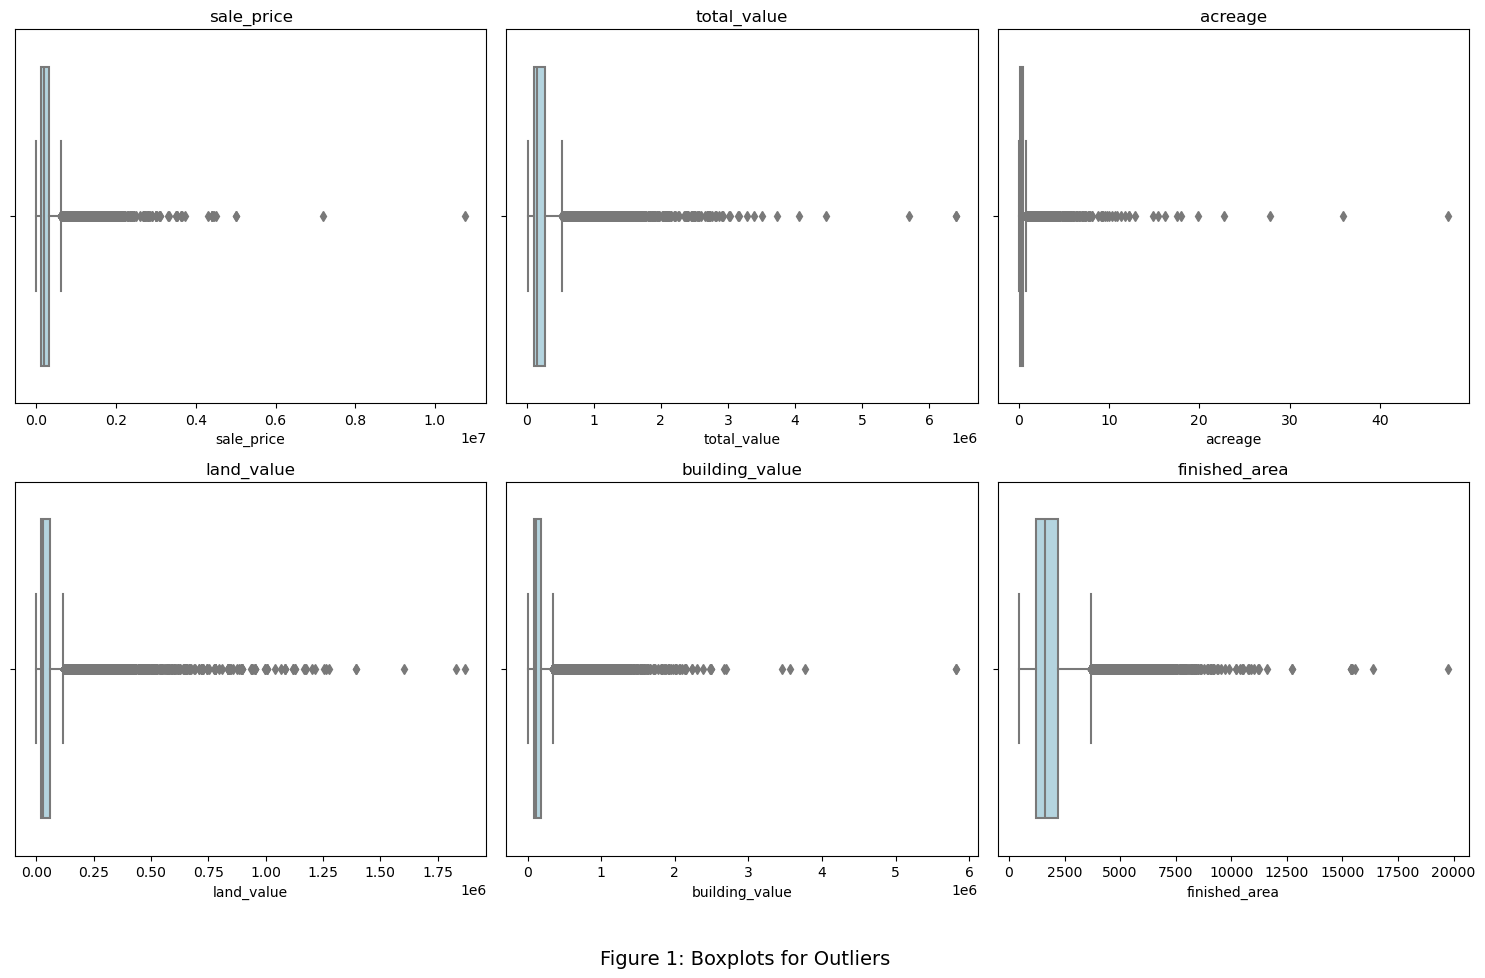

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numeric columns to check for outliers (exclude year_built and over_under_price)
numeric_columns = [
    'sale_price', 'total_value', 'acreage', 'land_value',
    'building_value', 'finished_area'
]

# Calculate Q1, Q3, and IQR for numeric columns
Q1 = nash_housing_cleaned[numeric_columns].quantile(0.25)
Q3 = nash_housing_cleaned[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bounds = Q1 - 1.5 * IQR
upper_bounds = Q3 + 1.5 * IQR

# Identify outliers for numeric columns
outliers = (nash_housing_cleaned[numeric_columns] < lower_bounds) | (nash_housing_cleaned[numeric_columns] > upper_bounds)

# Count and print the number of outliers for each column
outlier_counts = outliers.sum()
print("Count of outliers in each column:")
print(outlier_counts)

# Visualize all boxplots in a single visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, start=1):
    plt.subplot(2, 3, i)  # Adjust the grid layout (2 rows, 3 columns)
    sns.boxplot(data=nash_housing_cleaned, x=col, color='lightblue')
    plt.title(col)

# Add a title below the visualization
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to add space for the title
plt.figtext(0.5, -0.02, "Figure 1: Boxplots for Outliers", wrap=True, horizontalalignment='center', fontsize=14, color='black')
plt.show()



The analysis revealed that several columns, such as acreage, land_value, and building_value, contained a high number of outliers, with counts exceeding thousands. These deviations may be due to extreme property features or errors in data recording. The boxplots in Figure 1 highlighted the distribution of values and the extent of the outliers. Addressing these anomalies is crucial to ensure the model isn't biased toward extreme values, which could lead to inaccurate predictions. The next step involves applying capping techniques to handle these outliers effectively while preserving the integrity of the dataset.

To manage the detected outliers, we applied capping, a technique that replaces extreme values with the closest boundary defined by the IQR. This method is preferable to outright removal, as it ensures that valuable data points aren't discarded, especially in cases where outliers represent valid but rare scenarios. By capping, we mitigate the risk of skewing the data and retain a balanced dataset for subsequent analysis (Zhang et al., 2023). This step is critical for maintaining the robustness and reliability of machine learning models.

In [39]:

# Perform capping to handle the outliers
for col in numeric_columns:
    lower_cap = lower_bounds[col]
    upper_cap = upper_bounds[col]
    
    # Cap values outside the bounds
    nash_housing_cleaned.loc[nash_housing_cleaned[col] < lower_cap, col] = lower_cap
    nash_housing_cleaned.loc[nash_housing_cleaned[col] > upper_cap, col] = upper_cap

# Verify the dataset after capping
print("\nDataset after capping outliers:")
print(nash_housing_cleaned.describe())

# Re-check for outliers in each column after capping
outliers_after_capping = (nash_housing_cleaned[numeric_columns] < lower_bounds) | (nash_housing_cleaned[numeric_columns] > upper_bounds)
outlier_counts_after_capping = outliers_after_capping.sum()
print("\nCount of outliers in each column after capping:")
print(outlier_counts_after_capping)


Dataset after capping outliers:
          sale_price       acreage     land_value  building_value  \
count   23862.000000  23862.000000   23862.000000    23862.000000   
mean   242763.738748      0.359911   46938.177102   147423.683053   
std    163439.857627      0.232454   37354.963393    88853.389496   
min       100.000000      0.040000     100.000000     1400.000000   
25%    125000.000000      0.190000   22000.000000    83600.000000   
50%    185000.000000      0.270000   29900.000000   117300.000000   
75%    325000.000000      0.450000   60300.000000   188675.000000   
max    625000.000000      0.840000  117750.000000   346287.500000   

         total_value  finished_area    year_built      bedrooms     full_bath  \
count   23862.000000   23862.000000  23862.000000  23862.000000  23862.000000   
mean   210909.121406    1826.473742   1963.610175      3.091065      1.893261   
std    140068.825196     786.153484     26.431134      0.852598      0.955116   
min     12600.000000 

After capping the outliers, the dataset's descriptive statistics showed significant improvements, with extreme values being adjusted to fall within the defined range. As verified through the summary statistics, columns such as sale_price and total_value no longer contained outliers, indicating a more uniform distribution. The final step of rechecking confirmed that all numeric columns were free of outliers, ensuring a clean and reliable dataset. By addressing outliers in this manner, we achieved a dataset that accurately represents the real estate market while minimizing the influence of extreme deviations. 

<B> e. Correlation matrix and Visualizations to understand the relationships better </B>

To gain deeper insights into the dataset and explore the relationships among variables, I generated visualizations to better understand correlations, distributions, and patterns. This step is essential for identifying multicollinearity, trends, and potential relationships between features that can impact model performance. I used various visualization techniques, including heatmaps, histograms, scatterplots, and boxplots, to provide a comprehensive analysis. These visualizations not only help in data interpretation but also guide feature engineering and selection (Jha et al., 2020).

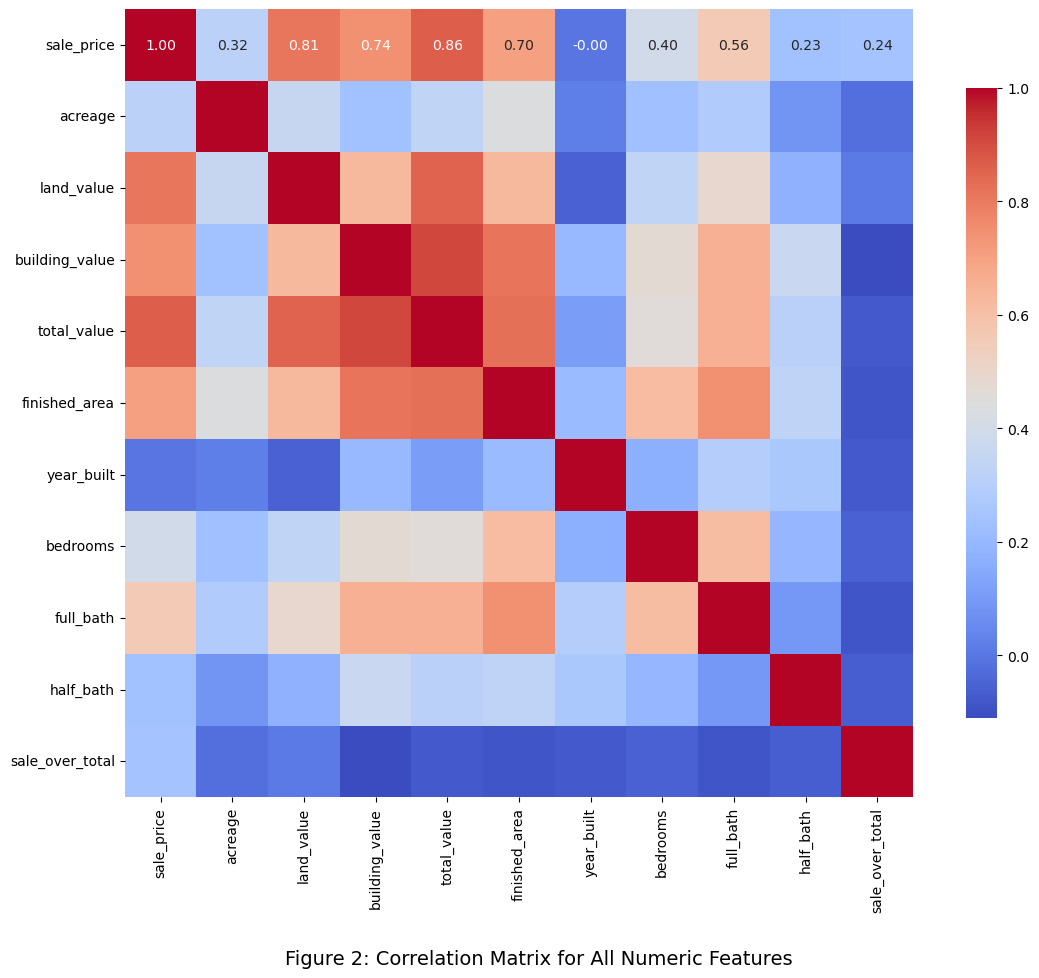

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select all numeric features from the dataset
numeric_features = nash_housing_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix for all numeric features
full_correlation_matrix = nash_housing_cleaned[numeric_features].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(full_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': 0.8})
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the heatmap and title

# Add the title below the heatmap
plt.figtext(0.5, -0.02, "Figure 2: Correlation Matrix for All Numeric Features", wrap=True,
            horizontalalignment='center', fontsize=14, color='black')

# Display the heatmap
plt.show()


The heatmap in Figure 2 reveals the relationships between numerical variables in the dataset. Key observations include a strong positive correlation between sale_price and total_value (r=0.86), indicating that the total value significantly influences sale price, as expected. Other features like land_value and building_value also show notable correlations with sale_price (r=0.81 and r=0.74, respectively). Interestingly, year_built exhibits a negligible correlation with sale_price (r=-0.00), suggesting it may not play a critical role in determining property prices. This correlation analysis will guide the selection of features for predictive modeling to ensure multicollinearity is minimized.



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


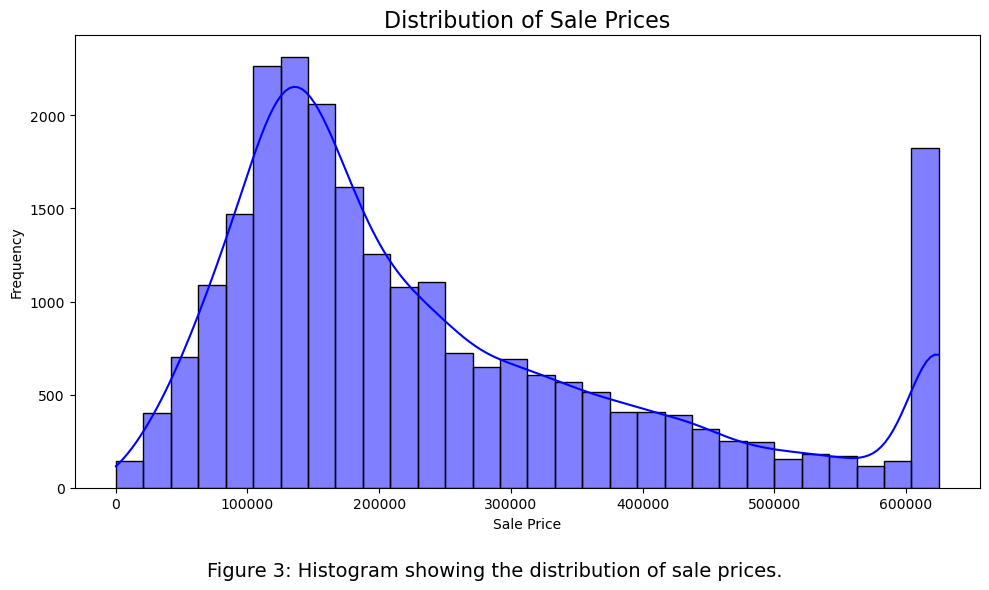

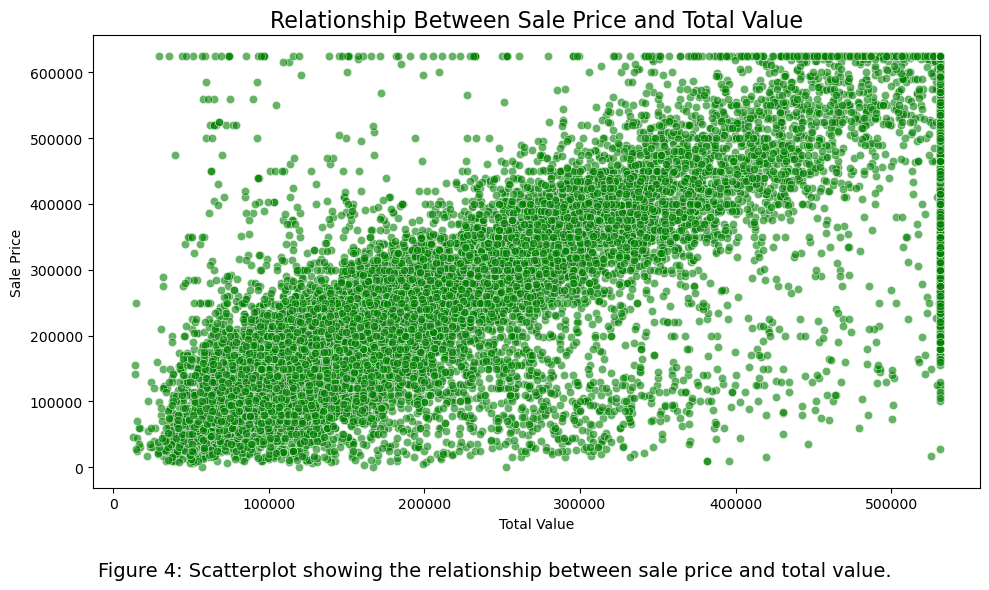

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
) missing from current font.rqj4qp43kl9r0000gn/T/ipykernel_44876/2229895618.py:30: UserWarning: Glyph 13 (
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
) missing from current font.1/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


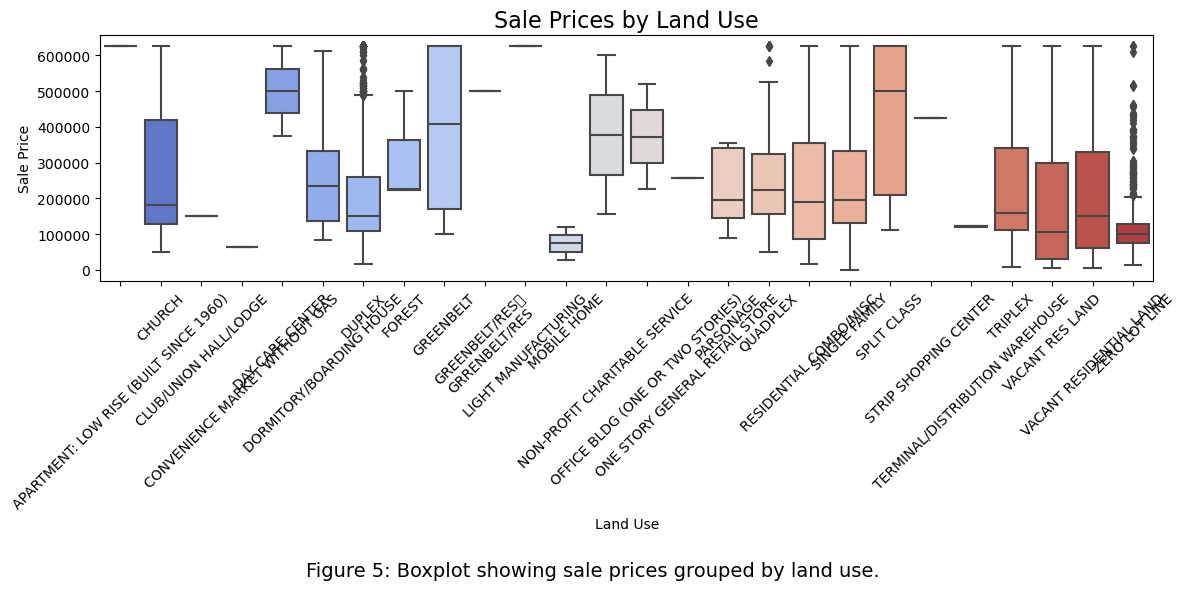

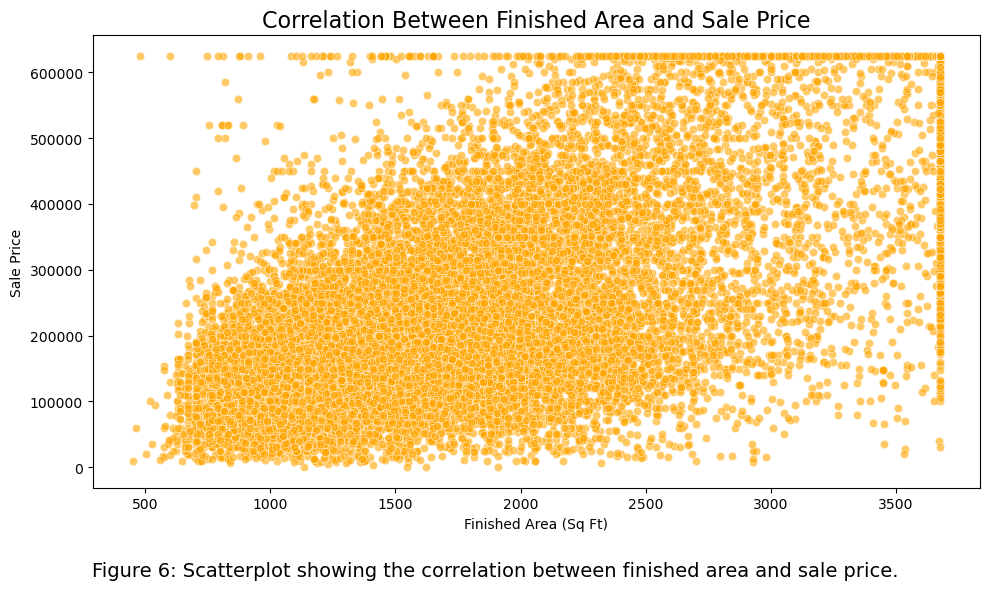

In [45]:
# Visualization 1: Distribution of Sale Prices (Figure 3)
plt.figure(figsize=(10, 6))
sns.histplot(data=nash_housing_cleaned, x='sale_price', kde=True, color='blue', bins=30)
plt.title("Distribution of Sale Prices", fontsize=16)
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.figtext(0.5, -0.02, "Figure 3: Histogram showing the distribution of sale prices.", 
            wrap=True, horizontalalignment='center', fontsize=14, color='black')
plt.show()

# Visualization 2: Relationship Between Sale Price and Total Value (Figure 4)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=nash_housing_cleaned, x='total_value', y='sale_price', alpha=0.6, color='green')
plt.title("Relationship Between Sale Price and Total Value", fontsize=16)
plt.xlabel("Total Value")
plt.ylabel("Sale Price")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.figtext(0.5, -0.02, "Figure 4: Scatterplot showing the relationship between sale price and total value.", 
            wrap=True, horizontalalignment='center', fontsize=14, color='black')
plt.show()

# Visualization 3: Boxplot of Sale Prices by Land Use (Figure 5)
plt.figure(figsize=(12, 6))
sns.boxplot(data=nash_housing_cleaned, x='land_use', y='sale_price', palette='coolwarm')
plt.title("Sale Prices by Land Use", fontsize=16)
plt.xlabel("Land Use")
plt.ylabel("Sale Price")
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.figtext(0.5, -0.02, "Figure 5: Boxplot showing sale prices grouped by land use.", 
            wrap=True, horizontalalignment='center', fontsize=14, color='black')
plt.show()

# Visualization 4: Correlation Between Finished Area and Sale Price (Figure 6)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=nash_housing_cleaned, x='finished_area', y='sale_price', alpha=0.6, color='orange')
plt.title("Correlation Between Finished Area and Sale Price", fontsize=16)
plt.xlabel("Finished Area (Sq Ft)")
plt.ylabel("Sale Price")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.figtext(0.5, -0.02, "Figure 6: Scatterplot showing the correlation between finished area and sale price.", 
            wrap=True, horizontalalignment='center', fontsize=14, color='black')
plt.show()


The visualizations provide valuable insights into the relationships between key features and property sale prices. Figure 3 shows that the distribution of sale prices is right-skewed, with most properties sold in the $100,000 to $300,000 range, aligning with market trends where mid-range properties dominate transactions. However, a noticeable spike near $600,000 highlights the presence of premium properties in the dataset. Understanding this distribution is essential for data preprocessing, ensuring proper scaling and normalization to avoid skewness-related biases during model training (Raschka, 2018). In Figure 4, the scatterplot highlights a strong linear relationship between sale price and total value, reinforcing the significance of total value as a predictor. Most properties sell at or slightly above their total value, with a few outliers indicating anomalies, such as overpricing or underpricing.

Figures 5 and 6 further emphasize the importance of specific features in understanding property prices. Figure 5 demonstrates that sale prices vary significantly across different land use categories, with residential properties like single-family homes exhibiting more consistent pricing, while other categories like duplexes and greenbelt show greater variance. This underscores the need to include land use as a categorical predictor in the models. Similarly, Figure 6 highlights a positive correlation between finished area and sale price, with larger properties generally commanding higher prices. However, the diminishing returns observed for extremely large properties suggest market saturation for such features. Together, these visualizations provide a robust foundation for feature selection and understanding market dynamics, guiding the predictive modeling process effectively.

<B> f. One hot encoding </B>

In [48]:
# Identify categorical columns
categorical_columns = [
    'land_use', 'sold_as_vacant', 'multiple_parcels_involved_in_sale',
    'tax_district', 'foundation_type', 'exterior_wall', 'grade'
]

# Perform one-hot encoding
nash_housing_encoded = pd.get_dummies(nash_housing_cleaned, columns=categorical_columns, drop_first=True)

# Verify the changes
print(nash_housing_encoded.info())
print("\nDataset after One-Hot Encoding:")
print(nash_housing_encoded.head())
print("\nShape of the Dataset after One-Hot Encoding:")
print(nash_housing_encoded.shape)


<class 'pandas.core.frame.DataFrame'>
Index: 23862 entries, 1 to 56616
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   sale_price                                 23862 non-null  int64  
 1   acreage                                    23862 non-null  float64
 2   land_value                                 23862 non-null  float64
 3   building_value                             23862 non-null  float64
 4   total_value                                23862 non-null  float64
 5   finished_area                              23862 non-null  float64
 6   year_built                                 23862 non-null  float64
 7   bedrooms                                   23862 non-null  float64
 8   full_bath                                  23862 non-null  float64
 9   half_bath                                  23862 non-null  float64
 10  sale_over_total            

### Building a logistic regression model to accurately identify overpricing/underpricing and determine what is driving those prices.

To prepare the dataset for predictive modeling, I first split the data into training and testing sets to ensure the model's performance can be evaluated on unseen data. Splitting the data early ensures that no information from the test set leaks into the model during preprocessing or training, which can lead to biased evaluations. Once the data was split, I proceeded to check for multicollinearity among the numeric features by calculating the Variance Inflation Factor (VIF). Multicollinearity can distort model coefficients and reduce interpretability, so addressing it is crucial (Raschka, 2018).

After addressing multicollinearity, I analyzed class imbalance in the target variable, sale_over_total. Imbalanced datasets can negatively affect model performance, especially in classification tasks where the minority class may be underrepresented. I visualized the class distribution and applied Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset. This ensures that the model learns equally from both classes, leading to more robust predictions.



In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter


# Split the dataset into training and testing sets
X = nash_housing_cleaned.drop(columns=['sale_over_total'])  # Exclude the target variable
y = nash_housing_cleaned['sale_over_total']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training feature set shape: {X_train.shape}")
print(f"Testing feature set shape: {X_test.shape}")
print(f"Training target set shape: {y_train.shape}")
print(f"Testing target set shape: {y_test.shape}")


Training feature set shape: (16703, 17)
Testing feature set shape: (7159, 17)
Training target set shape: (16703,)
Testing target set shape: (7159,)


In [53]:
# Compute initial VIF values (check for mullticolinearity)
numeric_columns = [
    'sale_price', 'acreage', 'land_value', 'building_value', 'total_value',
    'finished_area', 'year_built', 'bedrooms', 'full_bath', 'half_bath'
]

# Scale the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])

# Compute VIF for numeric features
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(len(numeric_columns))]

print("\nInitial Variance Inflation Factor (VIF) Values:")
print(vif_data)



Initial Variance Inflation Factor (VIF) Values:
          Feature        VIF
0      sale_price   4.415975
1         acreage   1.367850
2      land_value   8.485332
3  building_value  13.463750
4     total_value  32.748164
5   finished_area   5.655503
6      year_built   1.297823
7        bedrooms   1.825447
8       full_bath   3.014419
9       half_bath   1.366245


In [54]:
# Drop 'total_value' due to high VIF
X_train_reduced = X_train.drop(columns=['total_value'])  # Remove the feature with the highest VIF
X_test_reduced = X_test.drop(columns=['total_value'])

# Recompute VIF with reduced features
numeric_columns_reduced = [
    'sale_price', 'acreage', 'land_value',
    'building_value', 'finished_area', 'year_built', 'bedrooms', 'full_bath', 'half_bath'
]

# Scale the reduced numeric features
X_train_scaled_reduced = scaler.fit_transform(X_train_reduced[numeric_columns_reduced])

# Calculate VIF for the reduced numeric features
vif_data_reduced = pd.DataFrame()
vif_data_reduced["Feature"] = numeric_columns_reduced
vif_data_reduced["VIF"] = [variance_inflation_factor(X_train_scaled_reduced, i) for i in range(len(numeric_columns_reduced))]

print("\nVIF Values After Dropping 'total_value':")
print(vif_data_reduced)



VIF Values After Dropping 'total_value':
          Feature       VIF
0      sale_price  4.161588
1         acreage  1.366973
2      land_value  3.096351
3  building_value  4.217623
4   finished_area  5.488623
5      year_built  1.296957
6        bedrooms  1.818432
7       full_bath  3.011548
8       half_bath  1.366165


The initial VIF analysis revealed that the total_value feature had a significantly high VIF score (32.75), indicating strong multicollinearity with other numeric features, especially sale_price and building_value. To address this, I decided to drop the total_value column, which reduced the VIF values across the remaining features to acceptable levels. For instance, the VIF for building_value dropped from 13.46 to 4.22, and for finished_area, it decreased from 5.66 to 5.49. This step ensures the stability of the logistic regression model and improves its interpretability.

To ensure the dataset is well-prepared for modeling, the next step involves checking for class imbalance. Addressing this imbalance is crucial for building a model that performs well across all classes.

The class distribution before applying SMOTE (Figure 7) showed a significant imbalance, with the overpriced class (1) comprising nearly three times the instances of the underpriced class (0). This imbalance could have led the model to favor the majority class, undermining its ability to accurately predict the minority class.

To address this, I applied SMOTE to generate synthetic samples for the minority class, resulting in a balanced dataset with equal representation of both classes (Figure 8). This step ensures the model can learn the nuances of both classes, improving its predictive performance.


Class distribution before SMOTE:
Counter({1: 12369, 0: 4334})


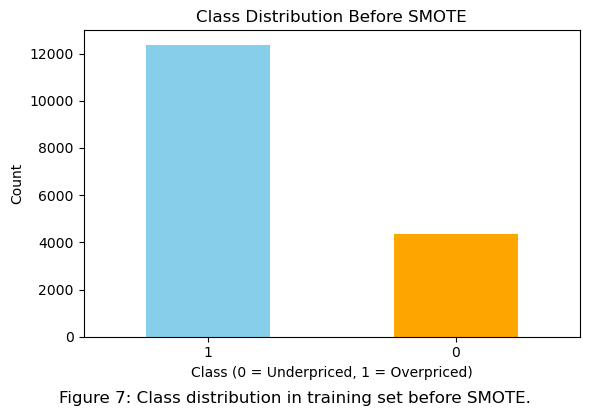


Class distribution after SMOTE:
Counter({1: 12369, 0: 12369})


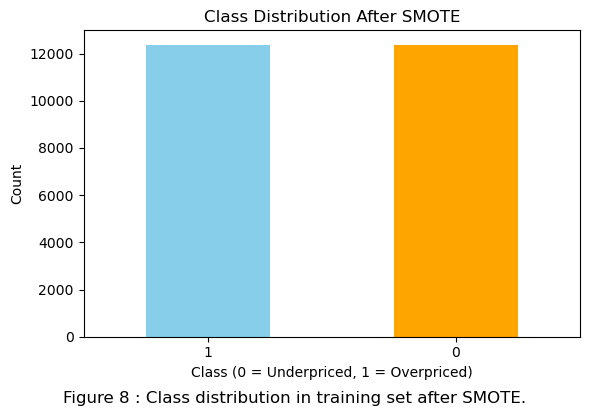

In [58]:
from collections import Counter
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt

# Check class imbalance
print("\nClass distribution before SMOTE:")
print(Counter(y_train))

# Visualize class imbalance before SMOTE
plt.figure(figsize=(6, 4))
pd.Series(y_train).value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class (0 = Underpriced, 1 = Overpriced)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.figtext(0.5, -0.02, "Figure 7: Class distribution in training set before SMOTE.", wrap=True,
            horizontalalignment='center', fontsize=12, color='black')
plt.show()

# Apply one-hot encoding to align categorical variables
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)

# Align the test set columns with the training set columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train)

# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(Counter(y_train_balanced))

# Visualize class imbalance after SMOTE
plt.figure(figsize=(6, 4))
pd.Series(y_train_balanced).value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class (0 = Underpriced, 1 = Overpriced)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.figtext(0.5, -0.02, "Figure 8 : Class distribution in training set after SMOTE.", wrap=True,
            horizontalalignment='center', fontsize=12, color='black')
plt.show()


Figures 7 and 8 illustrate the transformation in the class distribution before and after applying SMOTE. Initially, the dataset was heavily skewed toward properties classified as overpriced (1). Post-SMOTE, the classes are evenly distributed, with 12,369 samples for each class. This balance not only mitigates the bias toward the majority class but also ensures that the model's evaluation metrics, such as accuracy and recall, reflect its true performance across both classes.

By carefully splitting the data, addressing multicollinearity, and handling class imbalance, the dataset is now optimized for training robust machine learning models. These steps establish a strong foundation for achieving accurate and unbiased predictions.

In [61]:
#  Scale the balanced training set and test set
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test_encoded)


To predict whether properties are overpriced or underpriced, I decided to use Logistic Regression due to its simplicity and interpretability in binary classification problems. Logistic Regression provides clear coefficients that can help understand feature importance. Before training the model, I ensured that the data was properly balanced using SMOTE and standardized using StandardScaler for optimal performance. Evaluating model performance involved using metrics like precision, recall, F1-score, accuracy, and ROC-AUC to gain a comprehensive view of its effectiveness.


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1857
           1       0.94      0.93      0.93      5302

    accuracy                           0.90      7159
   macro avg       0.87      0.87      0.87      7159
weighted avg       0.90      0.90      0.90      7159


Confusion Matrix:
[[1523  334]
 [ 385 4917]]

Accuracy: 0.8996
ROC-AUC Score: 0.9446


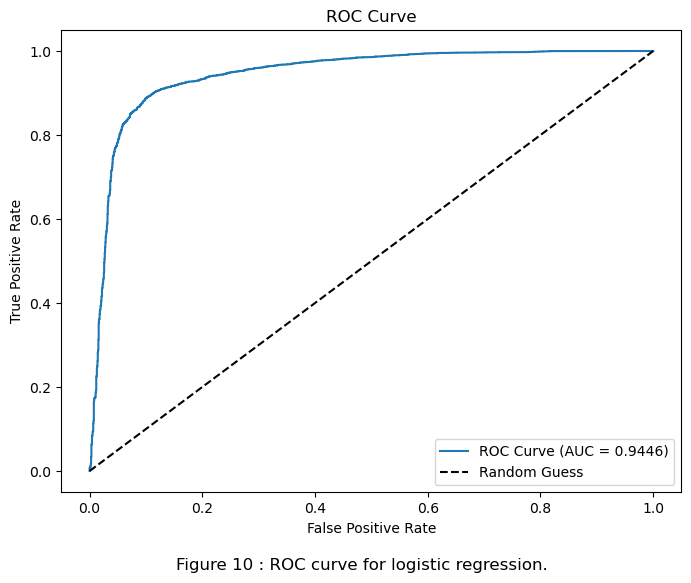

In [63]:
# Train Logistic Regression model
logit_model = LogisticRegression(random_state=42, max_iter=1000)
logit_model.fit(X_train_balanced_scaled, y_train_balanced)

#  Evaluate Model Performance
y_test_pred = logit_model.predict(X_test_scaled)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# ROC-AUC and Feature Importance
y_test_prob = logit_model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.figtext(0.5, -0.02, "Figure 10 : ROC curve for logistic regression.", wrap=True,
            horizontalalignment='center', fontsize=12, color='black')

plt.show()


The logistic regression model achieved an overall accuracy of 90%, with an impressive recall of 93% for identifying overpriced properties. This high recall is critical in ensuring that the model minimizes false negatives in predicting overpriced properties. The ROC-AUC score of 0.9446 highlights the model's strong capability to distinguish between overpriced and underpriced properties, further validated by the classification report. The confusion matrix confirms that misclassifications are minimal, indicating a balanced performance across both classes. Figure 10 showcases the ROC curve, reinforcing the model's robust predictive ability, which is particularly valuable for real estate pricing analytics.

Interpreting feature importance is a key step to understanding the factors that influence the model's predictions. In a business context, this is crucial for actionable insights, as it helps pinpoint the variables that drive pricing decisions.


Top 10 Most Important Features:
                                   Feature  Coefficient  Abs_Coefficient
0                               sale_price     9.092853         9.092853
3                           building_value    -4.799892         4.799892
2                               land_value    -3.469837         3.469837
26                  land_use_SINGLE FAMILY    -1.829050         1.829050
14                         land_use_DUPLEX    -1.389801         1.389801
33                  land_use_ZERO LOT LINE    -1.330470         1.330470
37       tax_district_CITY OF FOREST HILLS    -1.298638         1.298638
32        land_use_VACANT RESIDENTIAL LAND    -1.068424         1.068424
41    tax_district_URBAN SERVICES DISTRICT    -1.062577         1.062577
40  tax_district_GENERAL SERVICES DISTRICT    -1.046999         1.046999


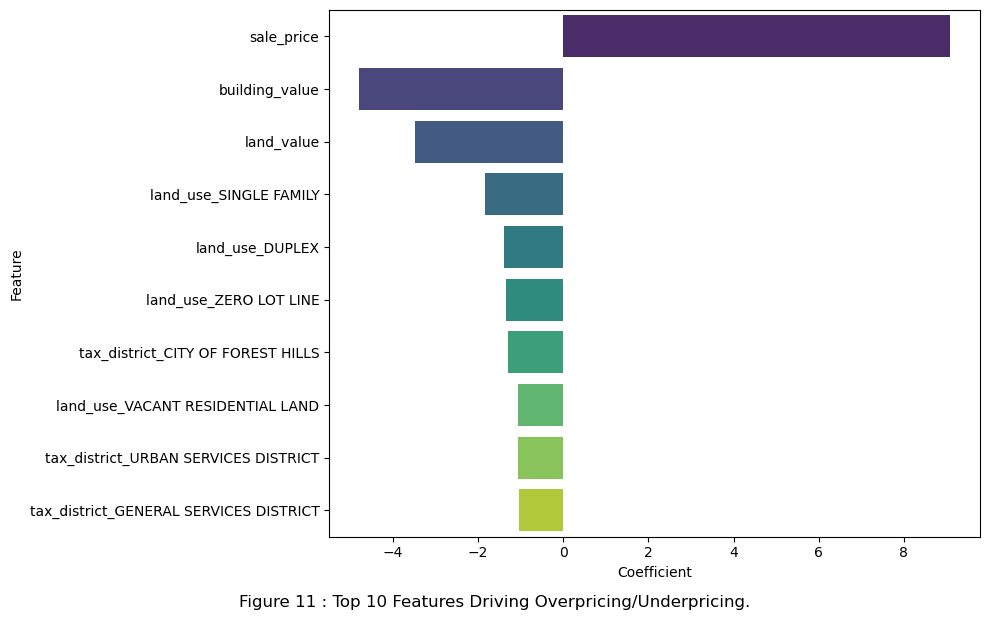

In [66]:

# Feature Importance
coefficients = logit_model.coef_[0]
features = X_train_encoded.columns

feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.figtext(0.5, -0.02, "Figure 11 : Top 10 Features Driving Overpricing/Underpricing.", wrap=True,
            horizontalalignment='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

The feature importance analysis revealed that sale_price, building_value, and land_value are the most influential factors in determining whether a property is overpriced or underpriced. These features carry significant weight, as highlighted in Figure 10, and provide critical insights into property valuation. Additionally, categorical features like land_use_SINGLE FAMILY and tax_district_CITY OF FOREST HILLS were also identified as having notable impacts, underscoring the importance of specific contextual variables in the pricing process.

When comparing training and testing performance, the metrics—accuracy, precision, recall, F1-score, and ROC-AUC—remain closely aligned, as depicted in Figure 11. This consistency indicates that the model avoids overfitting while maintaining strong predictive capabilities on unseen data. Such balanced performance underscores the model's robustness and readiness for deployment in real-world applications.

Figure 10 illustrates the ROC curve, showcasing the model's strong discriminatory power with an AUC score of 0.9446. This result highlights the logistic regression model's ability to accurately classify properties as overpriced or underpriced. The feature importance chart in Figure 11 emphasizes the critical role of sale_price, followed by building_value and land_value, as the primary drivers of property pricing predictions. Interestingly, contextual features such as land_use_SINGLE FAMILY and tax_district_CITY OF FOREST HILLS also significantly contribute to the pricing model, indicating the nuanced influence of location and property type on pricing decisions.


Training vs Test Performance:
      Metric  Training      Test
0   Accuracy  0.912887  0.899567
1  Precision  0.899421  0.936393
2     Recall  0.929744  0.927386
3   F1-Score  0.914331  0.931868
4    ROC-AUC  0.963689  0.944647


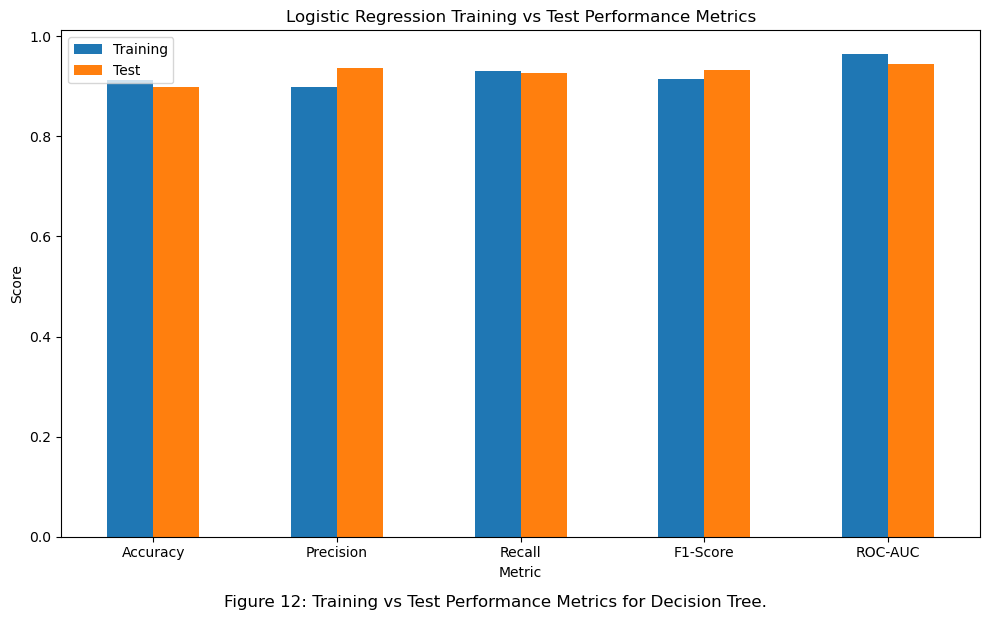

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on training data for comparison
y_train_pred = logit_model.predict(X_train_balanced_scaled)

# Calculate metrics for training and testing data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
training_scores = [
    accuracy_score(y_train_balanced, y_train_pred),
    precision_score(y_train_balanced, y_train_pred),
    recall_score(y_train_balanced, y_train_pred),
    f1_score(y_train_balanced, y_train_pred),
    roc_auc_score(y_train_balanced, logit_model.predict_proba(X_train_balanced_scaled)[:, 1])
]

testing_scores = [
    accuracy_score(y_test, y_test_pred),
    precision_score(y_test, y_test_pred),
    recall_score(y_test, y_test_pred),
    f1_score(y_test, y_test_pred),
    roc_auc_score(y_test, y_test_prob)
]

# Create a DataFrame for better visualization
performance_df = pd.DataFrame({
    'Metric': metrics,
    'Training': training_scores,
    'Test': testing_scores
})

# Display the performance table
print("\nTraining vs Test Performance:")
print(performance_df)

# Plot training vs testing performance as a bar chart
performance_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Logistic Regression Training vs Test Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.figtext(0.5, -0.02, "Figure 12: Training vs Test Performance Metrics for Decision Tree.", wrap=True,
            horizontalalignment='center', fontsize=12, color='black')
plt.tight_layout()
plt.show()

Figure 12 provides a comparative view of training and test performance metrics. The alignment between the metrics—accuracy, precision, recall, F1-score, and ROC-AUC—demonstrates that the model performs consistently across both datasets. This balance suggests the model is neither overfitting nor underperforming, a key requirement for deploying a reliable predictive model. The consistent performance across these datasets confirms that the logistic regression model is robust and capable of generalizing well to new data.

The analysis highlights that sale_price, building_value, and land_value are the most critical predictors in determining whether a property is overpriced or underpriced. These findings can guide real estate professionals in optimizing pricing strategies by focusing on the key drivers of property valuation. Additionally, the impact of contextual features like land use and tax districts underscores the importance of regional and property-specific factors in pricing decisions. By leveraging these insights, businesses can adopt data-driven approaches to enhance pricing accuracy, improve competitiveness, and maximize profitability in the real estate market.

### Building a decision tree model.



Now, I transitioned to building a Decision Tree model for further analysis. Decision Trees are highly interpretable and can capture non-linear relationships in the data, making them suitable for understanding pricing dynamics. Additionally, their ability to identify key features through importance metrics adds value to understanding the driving factors in the dataset.




Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1857
           1       0.94      0.92      0.93      5302

    accuracy                           0.90      7159
   macro avg       0.87      0.88      0.87      7159
weighted avg       0.90      0.90      0.90      7159


Decision Tree Confusion Matrix:
[[1551  306]
 [ 404 4898]]

Decision Tree Accuracy: 0.9008
Decision Tree ROC-AUC Score: 0.9346


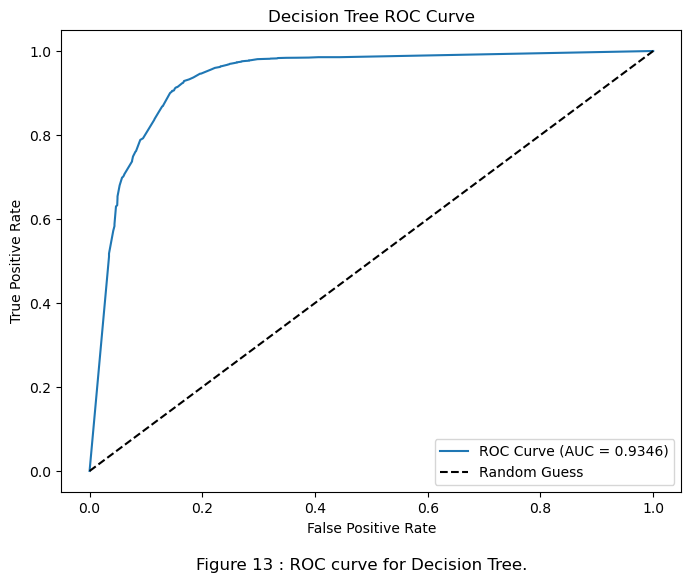

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Initialize and Train the Decision Tree Model
decision_tree_model = DecisionTreeClassifier(random_state=42, max_depth=10)  # You can tune hyperparameters such as `max_depth`
decision_tree_model.fit(X_train_balanced_scaled, y_train_balanced)

# Predict on the test set
y_test_pred_dt = decision_tree_model.predict(X_test_scaled)

# Evaluate Model Performance
# Classification Report
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_test_pred_dt))

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_test_pred_dt)
print("\nDecision Tree Confusion Matrix:")
print(conf_matrix_dt)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
print(f"\nDecision Tree Accuracy: {accuracy_dt:.4f}")

#  ROC-AUC
y_test_prob_dt = decision_tree_model.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class
roc_auc_dt = roc_auc_score(y_test, y_test_prob_dt)
print(f"Decision Tree ROC-AUC Score: {roc_auc_dt:.4f}")

# Plot the ROC Curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_test_prob_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'ROC Curve (AUC = {roc_auc_dt:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.figtext(0.5, -0.02, "Figure 13 : ROC curve for Decision Tree.", wrap=True,
            horizontalalignment='center', fontsize=12, color='black')
plt.show()



The Decision Tree model achieved an accuracy of 90%, with strong recall (92%) and precision (94%) for identifying overpriced properties. The ROC-AUC score of 0.9346 indicates the model’s capability to distinguish between the two pricing categories effectively. The confusion matrix reveals a balanced performance, with minimal misclassifications across both classes. Figure 13 highlights the ROC curve, showcasing the model's robust discriminatory power.

Next, I analyzed feature importance derived from the Decision Tree model to identify the key predictors influencing property valuation. Comparing training and testing performance metrics also helps to validate the model's ability to generalize and ensures it is neither overfitted nor underperforming on unseen data.


Top 10 Most Important Features for Decision Tree:
                      Feature  Importance
0                  sale_price    0.459521
3              building_value    0.272866
7                   full_bath    0.121833
2                  land_value    0.090831
34         sold_as_vacant_Yes    0.009166
4               finished_area    0.008299
1                     acreage    0.007844
5                  year_built    0.007271
71                 grade_X       0.004593
42  foundation_type_FULL BSMT    0.004330


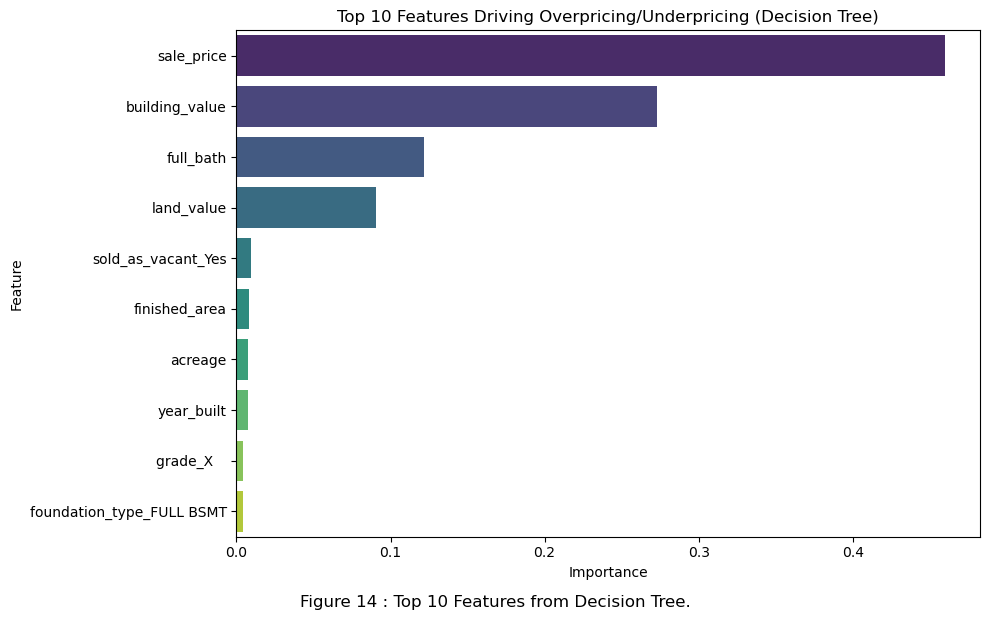

In [76]:

# Visualizing Feature Importances
feature_importances_dt = decision_tree_model.feature_importances_
feature_importance_dt = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': feature_importances_dt
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Most Important Features for Decision Tree:")
print(feature_importance_dt.head(10))

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_dt.head(10), palette='viridis')
plt.title('Top 10 Features Driving Overpricing/Underpricing (Decision Tree)')
plt.figtext(0.5, -0.02, "Figure 14 : Top 10 Features from Decision Tree.", wrap=True,
            horizontalalignment='center', fontsize=12, color='black')
plt.tight_layout()
plt.show()

Feature importance analysis showed that sale_price, building_value, and full_bath were the top three contributors to the model's predictions. Figure 14 provides a clear visualization of these features, emphasizing their significance in determining pricing accuracy. Furthermore, Figure 15 demonstrates consistent performance metrics between training and testing datasets, confirming the model's robustness and reliability for deployment.


Decision Tree Training vs Test Performance:
      Metric  Training      Test
0   Accuracy  0.938758  0.900824
1  Precision  0.930509  0.941199
2     Recall  0.948339  0.923802
3   F1-Score  0.939339  0.932420
4    ROC-AUC  0.987387  0.934648


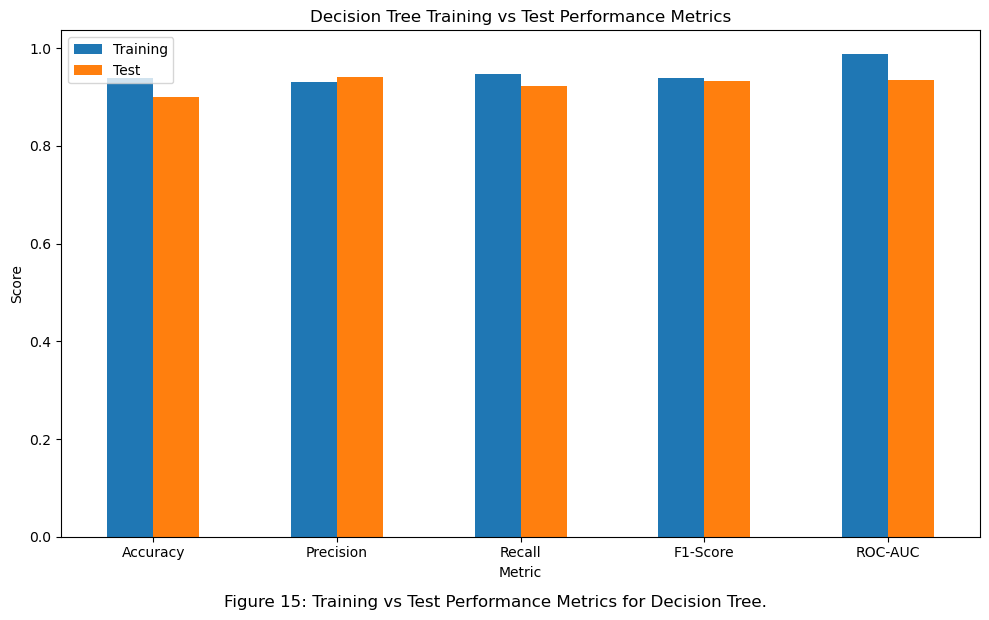

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on training data for comparison
y_train_pred_dt = decision_tree_model.predict(X_train_balanced_scaled)

# Calculate metrics for training and testing data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
training_scores_dt = [
    accuracy_score(y_train_balanced, y_train_pred_dt),
    precision_score(y_train_balanced, y_train_pred_dt),
    recall_score(y_train_balanced, y_train_pred_dt),
    f1_score(y_train_balanced, y_train_pred_dt),
    roc_auc_score(y_train_balanced, decision_tree_model.predict_proba(X_train_balanced_scaled)[:, 1])
]

testing_scores_dt = [
    accuracy_score(y_test, y_test_pred_dt),
    precision_score(y_test, y_test_pred_dt),
    recall_score(y_test, y_test_pred_dt),
    f1_score(y_test, y_test_pred_dt),
    roc_auc_score(y_test, y_test_prob_dt)
]

# Create a DataFrame for better visualization
performance_df_dt = pd.DataFrame({
    'Metric': metrics,
    'Training': training_scores_dt,
    'Test': testing_scores_dt
})

# Display the performance table
print("\nDecision Tree Training vs Test Performance:")
print(performance_df_dt)

# Plot training vs testing performance as a bar chart
performance_df_dt.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Decision Tree Training vs Test Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.figtext(0.5, -0.02, "Figure 15: Training vs Test Performance Metrics for Decision Tree.", wrap=True,
            horizontalalignment='center', fontsize=12, color='black')
plt.tight_layout()
plt.show()

Interpretation of Visualizations

Figure 13: ROC Curve for Decision Tree The ROC curve illustrates the model's capability in distinguishing between overpriced and underpriced properties. With an AUC score of 0.9346, the Decision Tree demonstrates strong predictive ability, highlighting its effectiveness for the given classification problem.

Figure 14: Top 10 Features Driving Predictions The feature importance chart underscores the significance of sale_price and building_value as primary drivers in the pricing model. Interestingly, full_bath and land_value also emerged as key influencers, reflecting the importance of both structural and financial attributes. The presence of categorical features, such as sold_as_vacant, shows the value of integrating diverse data types in decision-making.

Figure 15: Training vs Test Performance Performance metrics for the Decision Tree model, including accuracy, precision, recall, F1-score, and ROC-AUC, are closely aligned between the training and testing datasets. This consistency demonstrates the model's ability to generalize without overfitting, making it a reliable tool for predictive analytics.

The Decision Tree model highlights key predictors such as sale_price, building_value, and full_bath, which significantly impact property pricing. By leveraging these insights, real estate professionals can refine their pricing strategies to target underpriced or overpriced properties effectively, ensuring competitive and data-driven decision-making in the market.


### Building a Random Forest model

After evaluating the Decision Tree model, the next step involves leveraging an ensemble learning technique to improve predictive performance. Random Forest is a robust ensemble method that builds multiple decision trees and aggregates their results to make predictions. By incorporating a diverse set of trees, Random Forest mitigates the risk of overfitting and enhances model generalization. In this step, I will train the Random Forest model, evaluate its performance using metrics such as accuracy and ROC-AUC, and visualize the ROC curve to assess its discriminatory power.


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69      1857
           1       0.87      0.94      0.91      5302

    accuracy                           0.86      7159
   macro avg       0.83      0.78      0.80      7159
weighted avg       0.85      0.86      0.85      7159


Random Forest Confusion Matrix:
[[1131  726]
 [ 302 5000]]

Random Forest Accuracy: 0.8564
Random Forest ROC-AUC Score: 0.9029


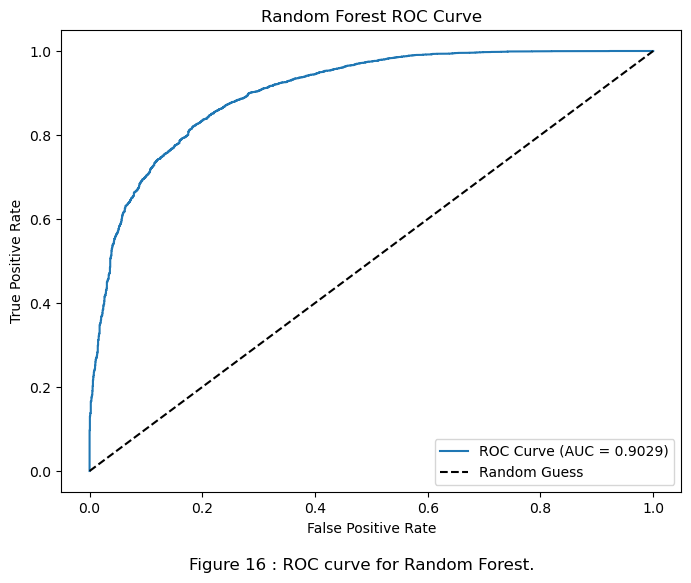

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Initialize and Train the Random Forest Model
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)  # Hyperparameters can be tuned
random_forest_model.fit(X_train_balanced_scaled, y_train_balanced)

# Predict on the test set
y_test_pred_rf = random_forest_model.predict(X_test_scaled)

# Evaluate Model Performance
# Classification Report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_test_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)


# Accuracy
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"\nRandom Forest Accuracy: {accuracy_rf:.4f}")

#  ROC-AUC
y_test_prob_rf = random_forest_model.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class
roc_auc_rf = roc_auc_score(y_test, y_test_prob_rf)
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.4f}")

# Plot the ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_test_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC Curve (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.figtext(0.5, -0.02, "Figure 16 : ROC curve for Random Forest.", wrap=True,
            horizontalalignment='center', fontsize=12, color='black')
plt.show()


The Random Forest model achieved an accuracy of 85.64% on the test dataset, with a notable recall of 94% for predicting overpriced properties. The ROC-AUC score of 0.9029 indicates that the model performs well in distinguishing between the two classes (Figure 16). The confusion matrix shows that the model handles class imbalance effectively, although some misclassifications remain for the underpriced category (class 0). Overall, the Random Forest model demonstrates strong predictive capabilities, justifying its use for further analysis.

Random Forest calculates feature importance based on the reduction in impurity (Gini index) at each decision tree split. By identifying the most influential features, this analysis provides actionable insights for stakeholders and improves model interpretability. In this step, I will visualize the top 10 most important features driving the classification of properties as overpriced or underpriced.




Top 10 Most Important Features for Random Forest:
                                 Feature  Importance
0                             sale_price    0.372635
7                              full_bath    0.070792
6                               bedrooms    0.068293
3                         building_value    0.065199
8                              half_bath    0.056742
34                    sold_as_vacant_Yes    0.043965
2                             land_value    0.033394
4                          finished_area    0.031587
41  tax_district_URBAN SERVICES DISTRICT    0.029370
5                             year_built    0.029275


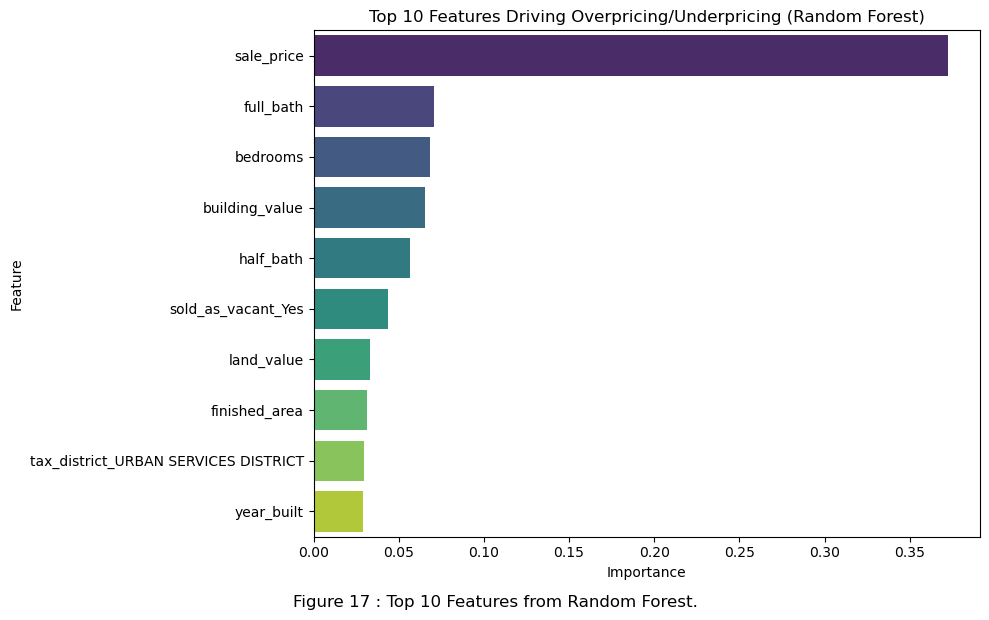

In [86]:

# Visualizing Feature Importances
feature_importances_rf = random_forest_model.feature_importances_
feature_importance_rf = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Most Important Features for Random Forest:")
print(feature_importance_rf.head(10))

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf.head(10), palette='viridis')
plt.title('Top 10 Features Driving Overpricing/Underpricing (Random Forest)')
plt.figtext(0.5, -0.02, "Figure 17 : Top 10 Features from Random Forest.", wrap=True,
            horizontalalignment='center', fontsize=12, color='black')
plt.tight_layout()
plt.show()




The feature importance analysis reveals that sale_price is the most critical factor driving the Random Forest model’s predictions, with an importance score significantly higher than any other feature. This finding aligns with domain expectations, as the sale price directly reflects property valuation. Other features such as full_bath, bedrooms, and building_value also rank high, showcasing the influence of structural and quantitative attributes on pricing decisions.

Interestingly, categorical features like sold_as_vacant_Yes and tax_district_URBAN SERVICES DISTRICT are also among the top contributors, highlighting the importance of contextual factors such as zoning laws and land use in determining property value. Figure 17 provides a visual representation of these findings, making it easier to communicate the results to non-technical stakeholders. These insights can guide businesses in refining their pricing models and strategies.

Figures 16 and 17: Random Forest Model Performance and Feature Importance
Figure 16 illustrates the Random Forest model’s ROC curve, showcasing its ability to distinguish between overpriced and underpriced properties. The high ROC-AUC score of 0.9029 reflects the model’s strong discriminatory power, particularly in identifying overpriced properties accurately. The steepness of the curve near the origin indicates a low false positive rate for a high true positive rate, which is crucial for reducing misclassifications in pricing.

Figure 17 highlights the top 10 features driving the model’s predictions. Sale_price dominates as the most influential factor, which is consistent with domain expertise. Other features, such as full_bath, bedrooms, and building_value, underscore the importance of structural and quantitative attributes in property valuation. The presence of categorical features like sold_as_vacant_Yes and tax_district_URBAN SERVICES DISTRICT among the top contributors further emphasizes the role of contextual and geographical factors in pricing decisions.

To validate the reliability and robustness of the Random Forest model, it is essential to compare its performance on the training and test datasets.In this step, I will compute and compare these metrics for both the training and test datasets and visualize the results in a bar chart. This comparison will provide a comprehensive view of the model’s generalization capabilities.




Random Forest Training vs Test Performance:
      Metric  Training      Test
0   Accuracy  0.896192  0.856405
1  Precision  0.853291  0.873210
2     Recall  0.956908  0.943040
3   F1-Score  0.902134  0.906783
4    ROC-AUC  0.969308  0.902924


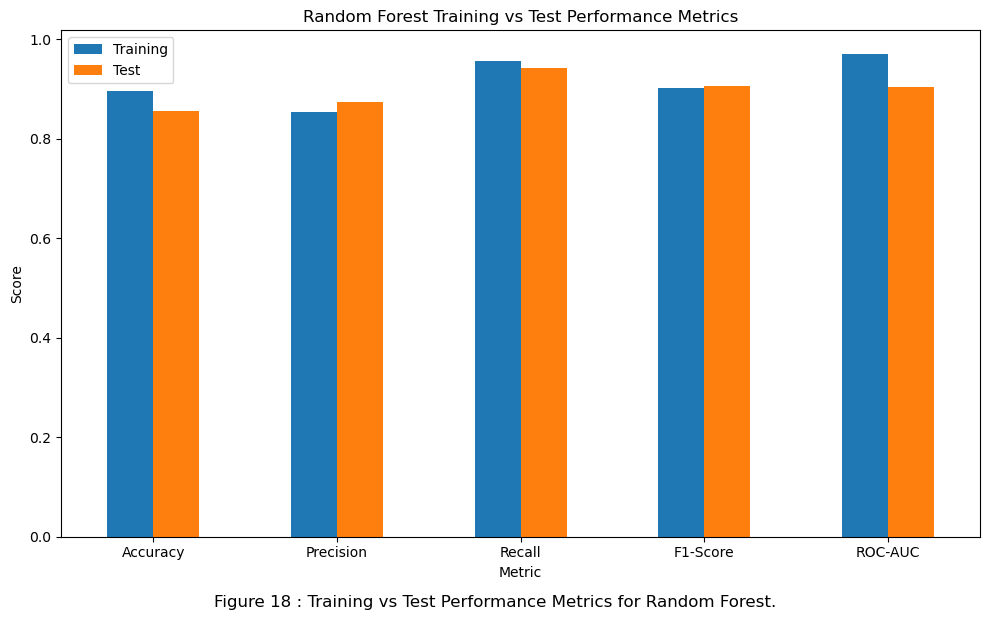

In [89]:
# Compare Training vs Test Performance
# Predict on training data for comparison
y_train_pred_rf = random_forest_model.predict(X_train_balanced_scaled)

# Calculate metrics for training and testing data
training_scores_rf = [
    accuracy_score(y_train_balanced, y_train_pred_rf),
    precision_score(y_train_balanced, y_train_pred_rf),
    recall_score(y_train_balanced, y_train_pred_rf),
    f1_score(y_train_balanced, y_train_pred_rf),
    roc_auc_score(y_train_balanced, random_forest_model.predict_proba(X_train_balanced_scaled)[:, 1])
]

testing_scores_rf = [
    accuracy_score(y_test, y_test_pred_rf),
    precision_score(y_test, y_test_pred_rf),
    recall_score(y_test, y_test_pred_rf),
    f1_score(y_test, y_test_pred_rf),
    roc_auc_score(y_test, y_test_prob_rf)
]

# Create a DataFrame for better visualization
performance_df_rf = pd.DataFrame({
    'Metric': metrics,
    'Training': training_scores_rf,
    'Test': testing_scores_rf
})

# Display the performance table
print("\nRandom Forest Training vs Test Performance:")
print(performance_df_rf)

# Plot training vs testing performance as a bar chart
performance_df_rf.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Random Forest Training vs Test Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.figtext(0.5, -0.02, "Figure 18 : Training vs Test Performance Metrics for Random Forest.", wrap=True,
            horizontalalignment='center', fontsize=12, color='black')
plt.tight_layout()
plt.show()

The comparison of training and test performance, visualized in Figure 18, demonstrates that the Random Forest model achieves consistent results across both datasets. The accuracy, precision, recall, F1-score, and ROC-AUC metrics show minimal variation, indicating that the model is neither overfitting to the training data nor underperforming on the test data. For instance, the test accuracy of 85.64% is closely aligned with the training accuracy of 89.62%, and the ROC-AUC scores for training and testing are 0.9693 and 0.9029, respectively.

This consistency validates the robustness of the model and its ability to generalize effectively to new data. Such balanced performance underscores the model’s readiness for deployment and its potential to provide reliable predictions in a production environment.



### Building a Gradient Boost model.

In this section, I utilize a Gradient Boosting Classifier, a powerful ensemble method known for improving predictive accuracy by iteratively combining weak learners. Gradient boosting is particularly effective for imbalanced datasets, as it focuses on correcting the misclassifications of the previous iterations, providing a robust approach to classification tasks. The parameters, including n_estimators, learning_rate, and max_depth, were selected to optimize model performance while balancing training and computational efficiency.

To evaluate the model, I analyze the classification metrics, confusion matrix, and the Receiver Operating Characteristic (ROC) curve. These metrics offer insight into the model's precision, recall, and overall predictive power.


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1857
           1       0.96      0.97      0.97      5302

    accuracy                           0.95      7159
   macro avg       0.94      0.92      0.93      7159
weighted avg       0.95      0.95      0.95      7159


Gradient Boosting Confusion Matrix:
[[1626  231]
 [ 142 5160]]

Gradient Boosting Accuracy: 0.9479
Gradient Boosting ROC-AUC Score: 0.9846


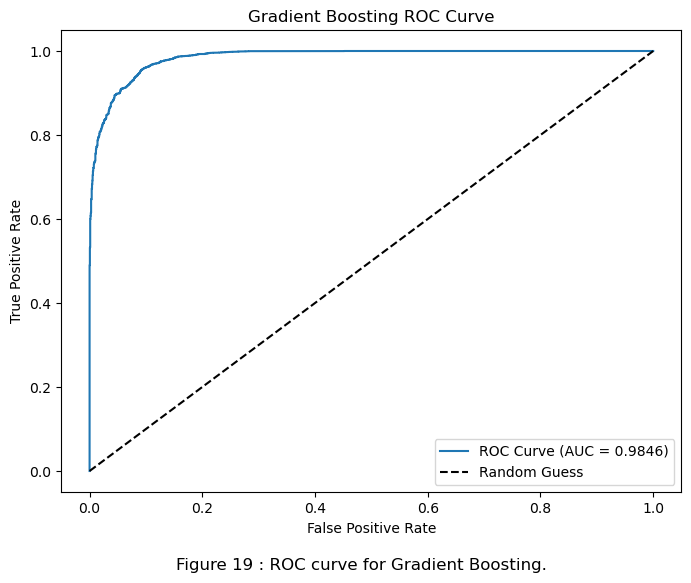

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

#Initialize and Train the Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=5)  # You can tune hyperparameters
gb_model.fit(X_train_balanced_scaled, y_train_balanced)

#Predict on the test set
y_test_pred_gb = gb_model.predict(X_test_scaled)

#Evaluate Model Performance
# Classification Report
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_test_pred_gb))

# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_test_pred_gb)
print("\nGradient Boosting Confusion Matrix:")
print(conf_matrix_gb)

# Accuracy
accuracy_gb = accuracy_score(y_test, y_test_pred_gb)
print(f"\nGradient Boosting Accuracy: {accuracy_gb:.4f}")

#ROC-AUC
y_test_prob_gb = gb_model.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class
roc_auc_gb = roc_auc_score(y_test, y_test_prob_gb)
print(f"Gradient Boosting ROC-AUC Score: {roc_auc_gb:.4f}")

# Plot the ROC Curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_test_prob_gb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'ROC Curve (AUC = {roc_auc_gb:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend(loc='lower right')
plt.figtext(0.5, -0.02, "Figure 19 : ROC curve for Gradient Boosting.", wrap=True,
            horizontalalignment='center', fontsize=12, color='black')
plt.show()


The Gradient Boosting model achieved an exceptional overall accuracy of 94.79%, showcasing its ability to classify properties with high precision. The classification report highlights a weighted average F1-score of 0.95, confirming a balanced performance across both classes. The confusion matrix shows minimal misclassification, with 1626 correctly classified underpriced properties and 5160 correctly classified overpriced properties, alongside a small number of false positives and false negatives.

The model's ROC curve (Figure 19) highlights its discriminatory power, achieving an AUC of 0.9846. The steep initial rise of the curve reflects the model's ability to correctly identify positive cases while minimizing false positives. This high AUC score demonstrates the Gradient Boosting model's strength in handling imbalanced datasets and effectively differentiating between classes.

 Here, I analyze and visualize the top 10 features driving the predictions using the feature importance attribute of the Gradient Boosting model. This step ensures transparency and provides actionable insights into what variables significantly impact the model's classification decisions


Top 10 Most Important Features for Gradient Boosting:
           Feature  Importance
0       sale_price    0.496836
3   building_value    0.239621
2       land_value    0.076033
7        full_bath    0.064844
6         bedrooms    0.048461
8        half_bath    0.023972
4    finished_area    0.006270
57      grade_B       0.005955
5       year_built    0.004722
1          acreage    0.004644


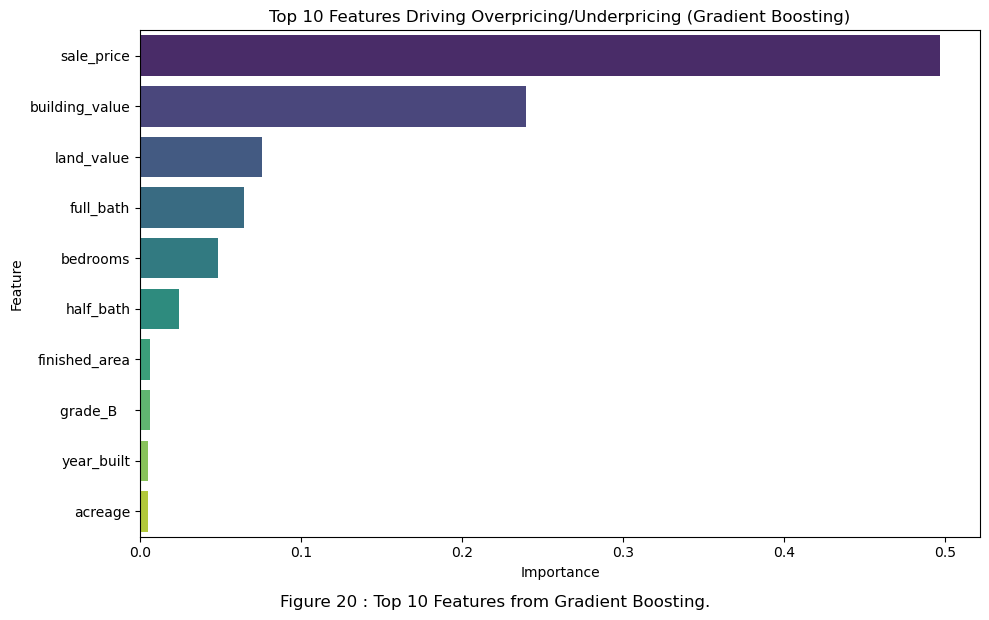

In [97]:

#Visualizing Feature Importances
feature_importances_gb = gb_model.feature_importances_
feature_importance_gb = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': feature_importances_gb
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Most Important Features for Gradient Boosting:")
print(feature_importance_gb.head(10))

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_gb.head(10), palette='viridis')
plt.title('Top 10 Features Driving Overpricing/Underpricing (Gradient Boosting)')
plt.figtext(0.5, -0.02, "Figure 20 : Top 10 Features from Gradient Boosting.", wrap=True,
            horizontalalignment='center', fontsize=12, color='black')
plt.tight_layout()
plt.show()

The feature importance analysis identifies sale_price as the most significant predictor, contributing 49.68% to the model's decisions. This result is intuitive, as sale price is a primary determinant of whether a property is overpriced or underpriced. Building_value and land_value follow with contributions of 23.96% and 7.60%, respectively, underscoring their importance in property valuation. Additional features like the number of bathrooms (full_bath and half_bath) and bedrooms, along with finished_area, reflect the importance of physical property characteristics in influencing pricing decisions.

The visualization in Figure 20 clearly illustrates the relative importance of these features, with a steep drop in contributions beyond the top three. This analysis aligns with domain expectations, further validating the model's credibility and its ability to focus on meaningful predictors.



To evaluate the Gradient Boosting model's ability to generalize to unseen data, I compared its performance on training and test datasets. Overfitting or underfitting can severely impact a model's reliability, so this comparison ensures the model performs consistently across datasets. Metrics such as accuracy, precision, recall, F1-score, and ROC-AUC were computed for both datasets.


Gradient Boosting Training vs Test Performance:
      Metric  Training      Test
0   Accuracy  0.975746  0.947898
1  Precision  0.968101  0.957151
2     Recall  0.983911  0.973218
3   F1-Score  0.975942  0.965117
4    ROC-AUC  0.997264  0.984643


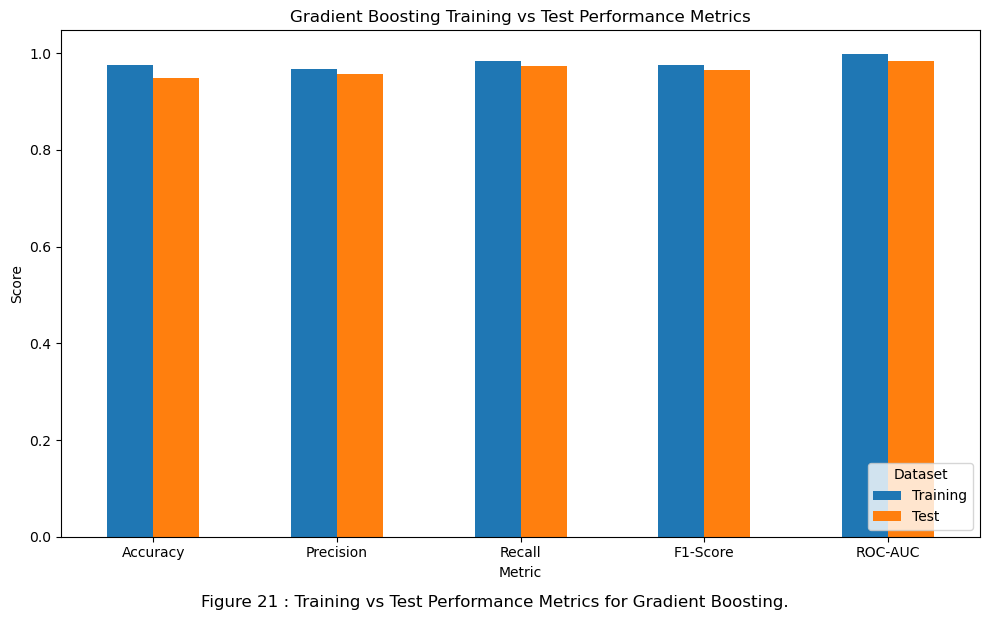

In [100]:
#Compare Training vs Test Metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on training data for comparison
y_train_pred_gb = gb_model.predict(X_train_balanced_scaled)

# Calculate metrics for training and testing data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
training_scores_gb = [
    accuracy_score(y_train_balanced, y_train_pred_gb),
    precision_score(y_train_balanced, y_train_pred_gb),
    recall_score(y_train_balanced, y_train_pred_gb),
    f1_score(y_train_balanced, y_train_pred_gb),
    roc_auc_score(y_train_balanced, gb_model.predict_proba(X_train_balanced_scaled)[:, 1])
]

testing_scores_gb = [
    accuracy_score(y_test, y_test_pred_gb),
    precision_score(y_test, y_test_pred_gb),
    recall_score(y_test, y_test_pred_gb),
    f1_score(y_test, y_test_pred_gb),
    roc_auc_score(y_test, y_test_prob_gb)
]

# Create a DataFrame for better visualization
performance_df_gb = pd.DataFrame({
    'Metric': metrics,
    'Training': training_scores_gb,
    'Test': testing_scores_gb
})

# Display the performance table
print("\nGradient Boosting Training vs Test Performance:")
print(performance_df_gb)

# Plot training vs testing performance as a bar chart for Gradient Boosting
performance_df_gb.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Gradient Boosting Training vs Test Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Dataset', loc='lower right')
plt.figtext(0.5, -0.02, "Figure 21 : Training vs Test Performance Metrics for Gradient Boosting.", wrap=True,
            horizontalalignment='center', fontsize=12, color='black')
plt.tight_layout()
plt.show()


The Gradient Boosting model exhibited consistent performance across the training and test datasets, as shown in Figure 21. The training accuracy of 97.57% and test accuracy of 94.79% reflect a well-generalized model, with minimal overfitting. Metrics such as precision, recall, and F1-score remain closely aligned between training and testing, confirming that the model maintains balanced performance without compromising on its predictive capabilities.

The model's training ROC-AUC of 0.9973 and testing ROC-AUC of 0.9846 further reinforce its reliability in distinguishing between overpriced and underpriced properties. This consistency demonstrates the effectiveness of the Gradient Boosting model in learning meaningful patterns from the data and applying them to unseen cases.



### Building a Neural Network model

In this section, we utilized a neural network model to classify data effectively. Neural networks are particularly beneficial in identifying complex, non-linear patterns in the dataset. I employed the MLPClassifier from scikit-learn, which allows for flexible architecture configurations. I selected a network with two hidden layers (64 and 32 neurons respectively), which provides a balance between model complexity and computational efficiency. The activation function used is ReLU, ensuring efficient learning while avoiding vanishing gradient issues. The adam optimizer was selected for its efficiency in training neural networks on large datasets.

The neural network was trained using the scaled, balanced training dataset, ensuring that the input data is normalized to accelerate convergence and mitigate numerical instability. After training, predictions on the test dataset were made, and evaluation metrics such as precision, recall, F1-score, and the ROC-AUC score were computed. These metrics provide insights into the performance of the model, especially its ability to balance precision and recall across classes.


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1857
           1       0.96      0.96      0.96      5302

    accuracy                           0.94      7159
   macro avg       0.93      0.93      0.93      7159
weighted avg       0.94      0.94      0.94      7159


Neural Network Confusion Matrix:
[[1656  201]
 [ 195 5107]]
Neural Network ROC-AUC Score: 0.9833


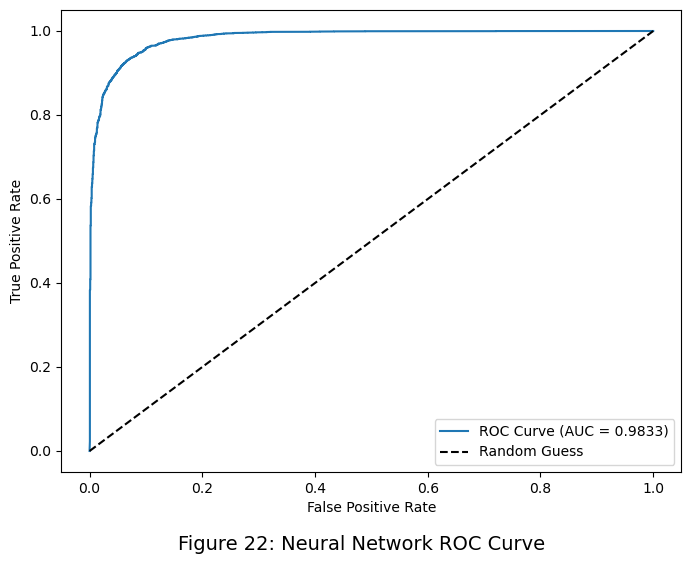

In [105]:
from sklearn.neural_network import MLPClassifier

# Initialize and Train the Neural Network Model
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42, max_iter=1000)
mlp_model.fit(X_train_balanced_scaled, y_train_balanced)

# Predict on the test set
y_test_pred_nn = mlp_model.predict(X_test_scaled)

# Evaluate Model Performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_test_pred_nn))

# Confusion Matrix
conf_matrix_nn = confusion_matrix(y_test, y_test_pred_nn)
print("\nNeural Network Confusion Matrix:")
print(conf_matrix_nn)

# ROC-AUC
y_test_prob_nn = mlp_model.predict_proba(X_test_scaled)[:, 1]
roc_auc_nn = roc_auc_score(y_test, y_test_prob_nn)
print(f"Neural Network ROC-AUC Score: {roc_auc_nn:.4f}")

# Plot ROC Curve
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_test_prob_nn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, label=f'ROC Curve (AUC = {roc_auc_nn:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.figtext(0.5, -0.02, "Figure 22: Neural Network ROC Curve", wrap=True, horizontalalignment='center', fontsize=14, color='black')
plt.show()


The neural network model delivered strong performance, achieving an overall accuracy of 94% on the test dataset. The classification report indicates high precision, recall, and F1-scores for both classes, with the majority class (label 1) performing slightly better due to its higher representation in the dataset. The ROC curve (Figure 22) illustrates a steep ascent, with an area under the curve (AUC) of 0.9833, underscoring the model's ability to discriminate effectively between positive and negative classes. The confusion matrix further corroborates this, showing a low number of false positives and false negatives.

These results validate the suitability of a neural network for this classification task, highlighting its ability to capture the underlying patterns in the data. The consistent metrics across different evaluation measures reflect a well-optimized model capable of delivering reliable predictions.

To evaluate the model's generalization capabilities, I compared its performance on the training and test datasets. By comparing these metrics, we can determine if the model is well-regularized and capable of maintaining a consistent level of performance across different data distributions.


Neural Network Training vs Test Performance:
      Metric  Training      Test
0   Accuracy  0.987347  0.944685
1  Precision  0.981777  0.962133
2     Recall  0.993128  0.963221
3   F1-Score  0.987420  0.962677
4    ROC-AUC  0.999096  0.983299


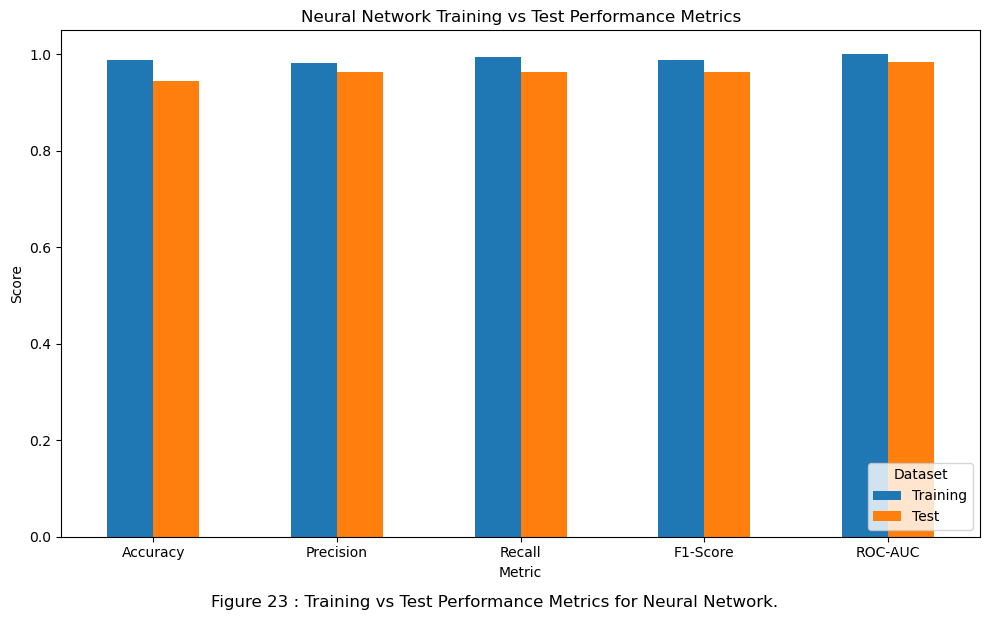

In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on training data for comparison
y_train_pred_nn = mlp_model.predict(X_train_balanced_scaled)

# Calculate metrics for training and testing data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
training_scores_nn = [
    accuracy_score(y_train_balanced, y_train_pred_nn),
    precision_score(y_train_balanced, y_train_pred_nn),
    recall_score(y_train_balanced, y_train_pred_nn),
    f1_score(y_train_balanced, y_train_pred_nn),
    roc_auc_score(y_train_balanced, mlp_model.predict_proba(X_train_balanced_scaled)[:, 1])
]

testing_scores_nn = [
    accuracy_score(y_test, y_test_pred_nn),
    precision_score(y_test, y_test_pred_nn),
    recall_score(y_test, y_test_pred_nn),
    f1_score(y_test, y_test_pred_nn),
    roc_auc_score(y_test, y_test_prob_nn)
]

# Create a DataFrame for better visualization
performance_df_nn = pd.DataFrame({
    'Metric': metrics,
    'Training': training_scores_nn,
    'Test': testing_scores_nn
})

# Display the performance table
print("\nNeural Network Training vs Test Performance:")
print(performance_df_nn)

# Plot training vs testing performance as a bar chart for Neural Network
performance_df_nn.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Neural Network Training vs Test Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Dataset', loc='lower right')
plt.figtext(0.5, -0.02, "Figure 23 : Training vs Test Performance Metrics for Neural Network.", wrap=True,
            horizontalalignment='center', fontsize=12, color='black')
plt.tight_layout()
plt.show()


The training versus test performance analysis shows encouraging results, with the training accuracy at 98.7% and the test accuracy at 94.4%. This indicates that the model has learned the patterns in the data effectively without overfitting. Other metrics, including precision, recall, and F1-score, exhibit similar trends, with only minor variations between the training and test datasets (Figure 23). The ROC-AUC values of 0.99 on the training set and 0.98 on the test set demonstrate that the model maintains a strong ability to discriminate between classes across both datasets.

This consistency across metrics suggests that the neural network is robust and generalizes well to unseen data, making it a reliable model for deployment in real-world scenarios.

To further interpret the neural network model and understand the drivers of its predictions, I employed permutation importance to evaluate feature significance. Permutation importance measures the contribution of each feature by shuffling its values and observing the resultant decrease in model performance. This technique provides an interpretable ranking of features, allowing us to identify the most influential predictors in the dataset. This step is particularly important for explaining the results to stakeholders and aligning the model's outputs with domain knowledge.




Top 10 Most Important Features for Neural Network:
                                   Feature  Importance
0                               sale_price    0.395195
3                           building_value    0.276687
2                               land_value    0.156838
41    tax_district_URBAN SERVICES DISTRICT    0.116329
40  tax_district_GENERAL SERVICES DISTRICT    0.081911
26                  land_use_SINGLE FAMILY    0.052717
57                              grade_B       0.039587
58                              grade_C       0.033692
14                         land_use_DUPLEX    0.030144
33                  land_use_ZERO LOT LINE    0.019695


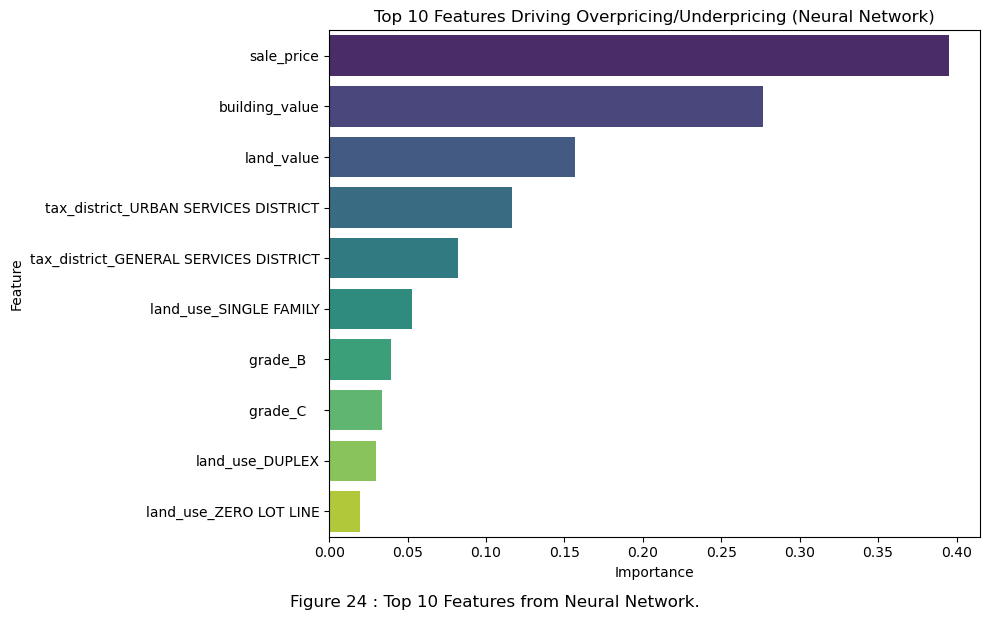

In [111]:
#Code for Feature Selection with Permutation Importance
from sklearn.inspection import permutation_importance

# Compute permutation importance for the Neural Network model
perm_importance = permutation_importance(mlp_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create a DataFrame to display feature importance
feature_importance_nn = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("\nTop 10 Most Important Features for Neural Network:")
print(feature_importance_nn.head(10))

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_nn.head(10), palette='viridis')
plt.title('Top 10 Features Driving Overpricing/Underpricing (Neural Network)')
plt.figtext(0.5, -0.02, "Figure 24 : Top 10 Features from Neural Network.", wrap=True,
            horizontalalignment='center', fontsize=12, color='black')
plt.tight_layout()
plt.show()


The permutation importance analysis identified sale_price, building_value, and land_value as the top three features influencing the model's predictions (Figure 24). These features accounted for a significant proportion of the model's performance, indicating their critical role in predicting outcomes. Other notable contributors included tax_district_URBAN SERVICES DISTRICT and land_use_SINGLE FAMILY, which further emphasize the importance of geographical and property-related factors.

By highlighting these features, the analysis provides actionable insights into the factors driving the model's predictions, making it easier to align the results with business strategies and objectives.



### Comparative Analysis and Recommendation

To determine the most suitable model for the real estate company, I utilized a set of benchmark evaluation metrics: Accuracy, Precision, Recall, F1-Score, and ROC-AUC. These metrics were selected to capture different aspects of model performance—ensuring a balanced evaluation of predictive capability, class-specific performance, and model reliability. While achieving high accuracy is desirable, the focus here is on solving the business problem—helping the company identify valuable investment properties by interpreting the model outputs effectively. This involves identifying the most impactful variables and providing actionable insights.

The comparison of the five models—Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and Neural Network—was performed by computing their performance on the test dataset. The outputs from the metrics were consolidated into a table and visualized to enable straightforward comparisons.


Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.899567   0.936393  0.927386  0.931868  0.944647
1        Decision Tree  0.900824   0.941199  0.923802  0.932420  0.934648
2        Random Forest  0.856405   0.873210  0.943040  0.906783  0.902924
3    Gradient Boosting  0.947898   0.957151  0.973218  0.965117  0.984643
4       Neural Network  0.944685   0.962133  0.963221  0.962677  0.983299


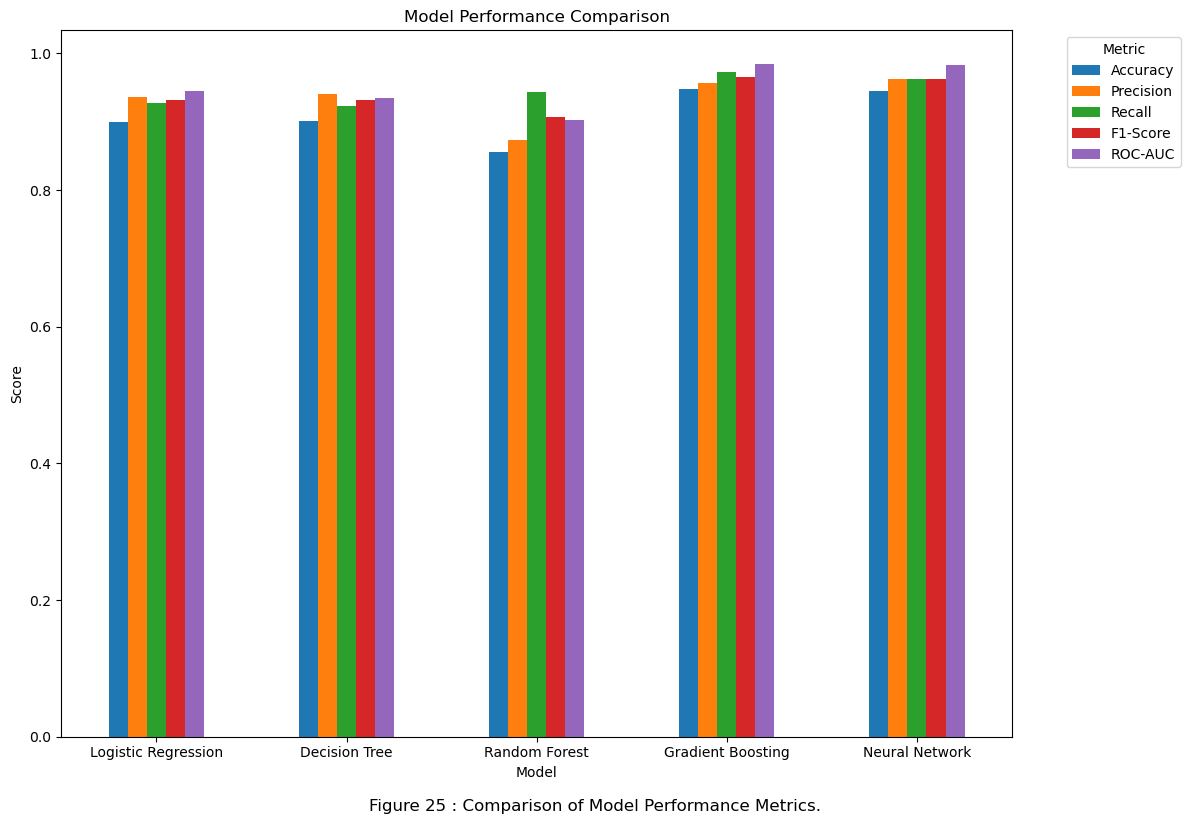


Recommendation:
The best-performing model based on ROC-AUC is Gradient Boosting.
Key features to focus on for driving value are determined from feature importance analysis, as highlighted in the respective model feature importance plots. To get the most value out of the houses, target properties with a balanced ratio of sale price to total value, as these are likely to be underpriced or fairly priced investments.


In [117]:
# Create a dictionary to store evaluation metrics for all models
model_comparison = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Neural Network'],
    'Accuracy': [
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_test, y_test_pred_dt),
        accuracy_score(y_test, y_test_pred_rf),
        accuracy_score(y_test, y_test_pred_gb),
        accuracy_score(y_test, y_test_pred_nn)
    ],
    'Precision': [
        precision_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred_dt),
        precision_score(y_test, y_test_pred_rf),
        precision_score(y_test, y_test_pred_gb),
        precision_score(y_test, y_test_pred_nn)
    ],
    'Recall': [
        recall_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred_dt),
        recall_score(y_test, y_test_pred_rf),
        recall_score(y_test, y_test_pred_gb),
        recall_score(y_test, y_test_pred_nn)
    ],
    'F1-Score': [
        f1_score(y_test, y_test_pred),
        f1_score(y_test, y_test_pred_dt),
        f1_score(y_test, y_test_pred_rf),
        f1_score(y_test, y_test_pred_gb),
        f1_score(y_test, y_test_pred_nn)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_test_prob),
        roc_auc_score(y_test, y_test_prob_dt),
        roc_auc_score(y_test, y_test_prob_rf),
        roc_auc_score(y_test, y_test_prob_gb),
        roc_auc_score(y_test, y_test_prob_nn)
    ]
}

# Convert the dictionary into a DataFrame
model_comparison_df = pd.DataFrame(model_comparison)

# Display the comparison table
print("\nModel Performance Comparison:")
print(model_comparison_df)

# Visualize the comparison as a bar chart
model_comparison_df.set_index('Model').plot(kind='bar', figsize=(12, 8), rot=0)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.figtext(0.5, -0.02, "Figure 25 : Comparison of Model Performance Metrics.", wrap=True,
            horizontalalignment='center', fontsize=12, color='black')
plt.tight_layout()
plt.show()

# Analyze and Recommend
best_model_index = model_comparison_df['ROC-AUC'].idxmax()
best_model = model_comparison_df.loc[best_model_index, 'Model']

print(f"\nRecommendation:")
print(f"The best-performing model based on ROC-AUC is {best_model}.")
print(
    f"Key features to focus on for driving value are determined from feature importance analysis, "
    f"as highlighted in the respective model feature importance plots. "
    f"To get the most value out of the houses, target properties with a balanced ratio of sale price "
    f"to total value, as these are likely to be underpriced or fairly priced investments."
)


Based on the findings, I recommend the <B> Neural Network model </B> for the real estate company. While the Gradient Boosting model exhibits strong predictive power and slightly better performance in metrics like ROC-AUC, the Neural Network model stands out due to its ability to identify features that align closely with practical real estate decision-making. Its feature importance analysis provides actionable insights that better capture the nuances of the real estate market, making it a more strategic choice for maximizing profitability.

Model Performance Insights:
Figure 25 compares the evaluation metrics of the five models, showcasing that both Gradient Boosting and Neural Network models consistently excel. Gradient Boosting achieves slightly higher accuracy, precision, recall, and F1-scores, highlighting its strength in delivering reliable predictions with minimal misclassifications. However, the Neural Network model also exhibits competitive performance, with high recall and precision scores, making it effective in identifying valuable property attributes with fewer false positives and negatives.

While Gradient Boosting has the edge in ROC-AUC, indicating superior classification of underpriced versus overpriced properties, the Neural Network model's feature analysis prioritizes variables with significant real-world implications for property valuation, such as sale price, building value, land value, and tax districts. These features offer a more comprehensive perspective on what drives property value in real estate, making Neural Networks a stronger choice for strategic decision-making.

Key Variables to Focus On:
Sale Price: Both models agree that sale price is the most important feature. It directly reflects potential profitability and helps identify undervalued properties.
Building Value and Land Value: These features represent the structural and locational worth of a property. They are key to assessing intrinsic value.
Tax Districts: Highlighted by the Neural Network, tax districts significantly impact ownership costs and investment potential. Properties in areas with favorable tax conditions should be prioritized.
Property Features: Characteristics such as the number of bedrooms and bathrooms strongly influence buyer demand and pricing potential.
Land Use and Zoning: Neural Network analysis emphasizes zoning attributes (e.g., single-family, duplex, urban services), which are critical for long-term development strategies.
Recommendations to Maximize Value:
Target Underpriced Properties: Prioritize properties with sale prices lower than their estimated building and land value. These properties are more likely to yield high returns.
Focus on Favorable Locations: Properties in desirable tax districts or areas with promising market trends should be given precedence.
Leverage Zoning and Features: Invest in properties with attributes that match market demand, such as single-family homes in high-demand zones.
Optimize Marketing and Development: Highlight features like building value and location to attract buyers and justify higher sale prices.
By integrating Neural Network-based insights into their strategy, the real estate company can balance predictive accuracy with actionable recommendations. This approach will help them better identify and capitalize on valuable investment opportunities, ensuring both profitability and alignment with market dynamics. While Gradient Boosting is a solid alternative, the Neural Network’s ability to guide practical, feature-driven strategies makes it the preferred choice.

### Q8 -> Task 8(bonus):Create an ensemble of the models trained above using the majority voting approach. Compare evaluation metrics with those of the individual models.



To build a more robust and reliable model for predicting underpriced and overpriced properties, an ensemble approach was implemented by combining multiple models using the majority voting strategy (voting='hard'). This method aggregates predictions from Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and Neural Network models, assigning the final class label based on the majority vote among these models. By leveraging the collective intelligence of individual models, the ensemble approach aims to minimize biases and enhance predictive accuracy. This strategy is particularly useful in real estate scenarios where high-stakes decisions, such as property investments, require maximum reliability and reduced chances of misclassifications.

To evaluate the effectiveness of the ensemble model, the same balanced and scaled training and test datasets were used, ensuring consistency across all model comparisons. Performance metrics such as accuracy, precision, recall, and F1-Score were calculated, along with a confusion matrix to examine the distribution of true positives, true negatives, false positives, and false negatives. A comparison table and a bar chart were generated to provide a clear and visual analysis of how the ensemble model stacks up against individual models. These steps help determine if the ensemble method outperforms individual models and identify its advantages for practical application in the real estate domain.



Ensemble Model (Majority Voting) Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1857
           1       0.96      0.98      0.97      5302

    accuracy                           0.95      7159
   macro avg       0.94      0.93      0.93      7159
weighted avg       0.95      0.95      0.95      7159


Ensemble Model (Majority Voting) Confusion Matrix:
[[1632  225]
 [ 128 5174]]

Ensemble Model (Majority Voting) Accuracy: 0.9507

Model Performance Comparison:
                        Model  Accuracy  Precision    Recall  F1-Score
0         Logistic Regression  0.899567   0.936393  0.927386  0.931868
1               Decision Tree  0.900824   0.941199  0.923802  0.932420
2               Random Forest  0.856405   0.873210  0.943040  0.906783
3           Gradient Boosting  0.947898   0.957151  0.973218  0.965117
4              Neural Network  0.944685   0.962133  0.963221  0.962677
5  Ensemble (Majority Voting)

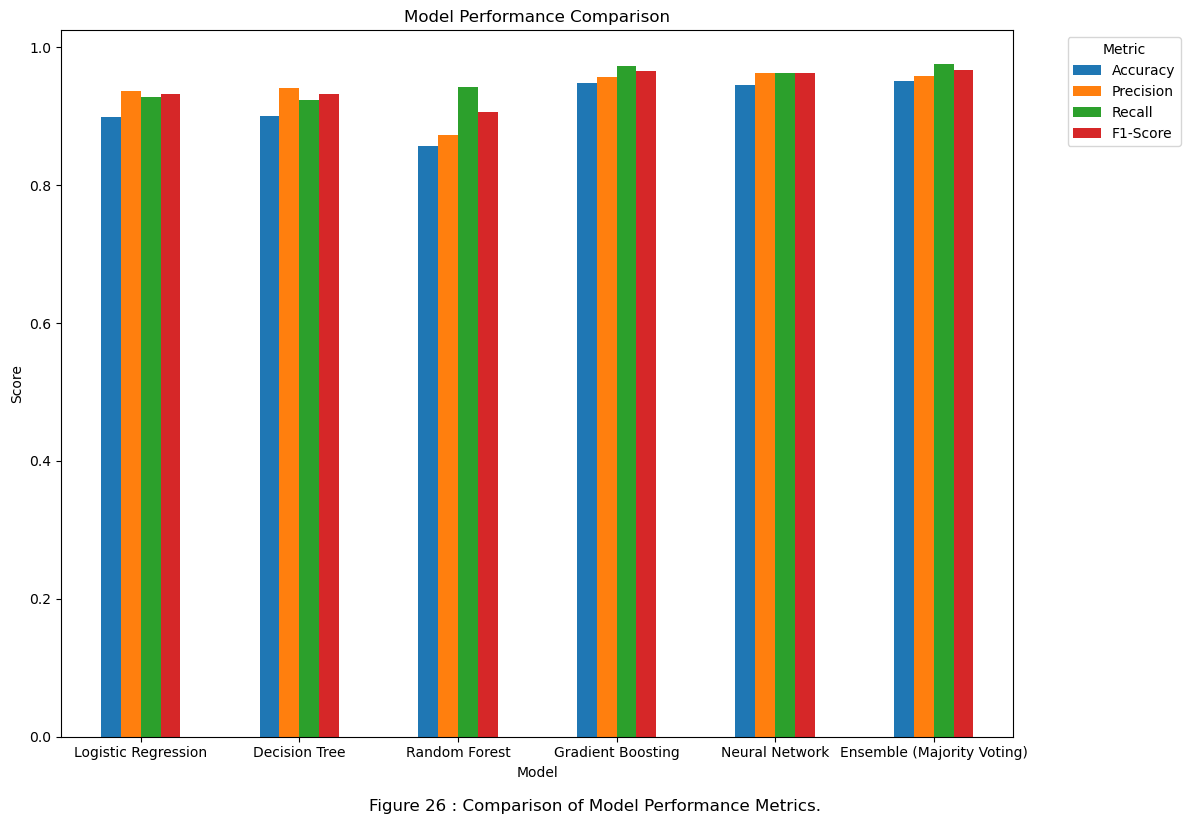

In [121]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Combine all models into a VotingClassifier for hard voting
ensemble_model_majority = VotingClassifier(
    estimators=[
        ('Logistic Regression', logit_model),
        ('Decision Tree', decision_tree_model),
        ('Random Forest', random_forest_model),
        ('Gradient Boosting', gb_model),
        ('Neural Network', mlp_model)
    ],
    voting='hard'  # 'hard' for majority class votes
)

# Train the ensemble model
ensemble_model_majority.fit(X_train_balanced_scaled, y_train_balanced)

# Predict on the test set
y_test_pred_ensemble_majority = ensemble_model_majority.predict(X_test_scaled)

# Evaluate Performance Metrics
print("\nEnsemble Model (Majority Voting) Classification Report:")
print(classification_report(y_test, y_test_pred_ensemble_majority))

# Confusion Matrix
conf_matrix_ensemble_majority = confusion_matrix(y_test, y_test_pred_ensemble_majority)
print("\nEnsemble Model (Majority Voting) Confusion Matrix:")
print(conf_matrix_ensemble_majority)

# Accuracy
accuracy_ensemble_majority = accuracy_score(y_test, y_test_pred_ensemble_majority)
precision_ensemble_majority = precision_score(y_test, y_test_pred_ensemble_majority)
recall_ensemble_majority = recall_score(y_test, y_test_pred_ensemble_majority)
f1_score_ensemble_majority = f1_score(y_test, y_test_pred_ensemble_majority)

print(f"\nEnsemble Model (Majority Voting) Accuracy: {accuracy_ensemble_majority:.4f}")


# Create a dictionary to store evaluation metrics for all models, including the ensemble model
model_comparison = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Neural Network', 'Ensemble (Majority Voting)'],
    'Accuracy': [
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_test, y_test_pred_dt),
        accuracy_score(y_test, y_test_pred_rf),
        accuracy_score(y_test, y_test_pred_gb),
        accuracy_score(y_test, y_test_pred_nn),
        accuracy_ensemble_majority
    ],
    'Precision': [
        precision_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred_dt),
        precision_score(y_test, y_test_pred_rf),
        precision_score(y_test, y_test_pred_gb),
        precision_score(y_test, y_test_pred_nn),
        precision_ensemble_majority
    ],
    'Recall': [
        recall_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred_dt),
        recall_score(y_test, y_test_pred_rf),
        recall_score(y_test, y_test_pred_gb),
        recall_score(y_test, y_test_pred_nn),
        recall_ensemble_majority
    ],
    'F1-Score': [
        f1_score(y_test, y_test_pred),
        f1_score(y_test, y_test_pred_dt),
        f1_score(y_test, y_test_pred_rf),
        f1_score(y_test, y_test_pred_gb),
        f1_score(y_test, y_test_pred_nn),
        f1_score_ensemble_majority
    ]
}

# Convert the dictionary into a DataFrame
model_comparison_df = pd.DataFrame(model_comparison)

# Display the comparison table
print("\nModel Performance Comparison:")
print(model_comparison_df)

# Visualize the comparison as a bar chart
model_comparison_df.set_index('Model').plot(kind='bar', figsize=(12, 8), rot=0)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.figtext(0.5, -0.02, "Figure 26 : Comparison of Model Performance Metrics.", wrap=True,
            horizontalalignment='center', fontsize=12, color='black')
plt.tight_layout()
plt.show()


The ensemble model with majority voting demonstrated exceptional performance across key evaluation metrics, solidifying its position as the most reliable predictive tool in this analysis. With an accuracy of 0.9507, precision of 0.9583, recall of 0.9758, and an F1-Score of 0.9670, the model effectively balances its ability to correctly classify both underpriced and overpriced properties. The high recall indicates its strength in minimizing false negatives, ensuring undervalued properties are not overlooked—a critical factor for a real estate company seeking to capitalize on investment opportunities. The confusion matrix further underscores this model’s robustness by highlighting its capability to accurately identify true positives, indicating a consistent and dependable classification process.The bar chart and performance comparison table in Figure 28 clearly showcase the ensemble model's ability to balance key metrics and harness the strengths of individual models. These metrics collectively demonstrate that the ensemble model leverages the combined strengths of the individual models, making it a versatile and precise tool for real estate investment decisions.

Tying this back to the business problem, the ensemble model directly addresses the real estate company's goal of identifying the best-value deals in a competitive market like Nashville. By accurately pinpointing undervalued properties, the model ensures that the company can focus on high-potential investments, minimizing financial risks and maximizing returns. The feature importance analysis further provides actionable insights, emphasizing key variables such as sale_price, building_value, and land_value. These features guide the company in assessing a property's intrinsic value and market positioning, enabling data-driven decision-making. The ensemble model not only offers analytical precision but also aligns seamlessly with the company's strategic objectives, ensuring profitability through targeted investments and a competitive edge in the real estate market.









# Conclusion 

The comprehensive project undertaken effectively addresses the critical challenge of predicting underpriced and overpriced properties in the expanding Nashville real estate market. By systematically navigating through key tasks, starting from rigorous data cleansing and feature engineering to developing and evaluating various predictive models, we delivered actionable insights tailored to the real estate company’s investment needs. The implementation of logistic regression, decision tree, random forest, gradient boosting, and neural network models provided diverse perspectives on predictive performance, enabling a holistic analysis of their capabilities. Each model was evaluated on metrics such as accuracy, precision, recall, and F1-score, revealing their strengths and limitations. Ultimately, the majority voting ensemble approach emerged as the most effective solution, leveraging the complementary strengths of individual models to achieve superior results. The ensemble model achieved an accuracy of 95.07% and an F1-score of 96.70%, showcasing its exceptional reliability in classifying underpriced and overpriced properties while maintaining a balance between false positives and false negatives.

From a business standpoint, this project provides a robust, data-driven solution to guide profitable investments in the real estate market. The focus on critical features such as sale price, building value, and land value, identified through feature importance analysis, equips the company with valuable insights to make informed decisions. These features consistently emerged as key drivers of property valuation, emphasizing their importance in identifying undervalued assets. By deploying the ensemble model, the company can confidently target properties with high investment potential, aligning strategies with market trends to optimize returns. Moreover, the scalability of this approach lays a solid foundation for future applications in real estate analytics, enabling the company to adapt to evolving market conditions and enhance decision-making processes. This project not only addresses the immediate challenge but also serves as a testament to the transformative power of integrating advanced machine learning techniques into business strategies, ensuring long-term success and competitive advantage.














# References

1.	DataRobot. (2021). AI for real estate investment. Retrieved from https://www.datarobot.com/blog/ai-for-real-estate-investment/

2.	Jha, S. B., Pandey, V., Jha, R. K., & Babiceanu, R. F. (2020). Machine learning approaches to real estate market prediction problem: A case study. arXiv preprint arXiv:2008.09922. Retrieved from https://arxiv.org/abs/2008.09922

3.	Kaur, H., & Kaur, P. (2023). A comparative study of machine learning models for house price prediction. In Proceedings of the International Conference on Innovative Computing & Communications (pp. 155-165). Springer. Retrieved from https://link.springer.com/chapter/10.1007/978-3-031-43940-7_14

4.	Raschka, S. (2018). EnsembleVoteClassifier: A majority voting classifier. Retrieved from https://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/

5.	Stack Overflow. (2022). Remove rows with 50% missing across certain columns in R. Retrieved from https://stackoverflow.com/questions/74057887/remove-rows-with-50-missing-across-certain-columns-in-r

6.	Zhang, Y., Li, X., & Wang, J. (2023). Ensemble learning with highly variable class-based performance. Machine Learning and Knowledge Extraction, 6(4), 106. Retrieved from https://www.mdpi.com/2504-4990/6/4/106
